In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#downloading the dataset

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:01<00:00, 2.31MB/s]


In [3]:
df=pd.read_csv("/content/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1) Problem statement  and Analysing the basic metrics

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries




EXPLORATION OF DATASET TO ANALYZE BASIC METRICS

In [4]:
print("No : of records: ",df.shape[0])
print("No : of features: ",df.shape[1])

No : of records:  8807
No : of features:  12


In [5]:
# FINDING THE DATATYPES AND OTHER INFO ABOUT THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Dataset consist of 8807 records with 12 columns and 'release_year' is the only numerical variable and others are of object datatype

Null values are present in directors,cast,country,duration,date_added,rating

#MISSING VALUE DETECTION

In [6]:
#finding out no:of null values in each columns(missing value detection)
df.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#finding out total no:of null values in dataset
print("No:of null values in the dataset : ",df.isnull().sum(axis=0).sum())

No:of null values in the dataset :  4307


In [8]:
# checking unique values in each columns
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# 2) Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [9]:
#shape
df.shape

(8807, 12)

In [10]:
#statistical summary

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [12]:
print(df['release_year'].min(),df['release_year'].max())

1925 2021


The dataset contains the information about the movies/tv shows released between 1925 and 2021.

The no: of unique types are 2 (Movie, TV Show)

# 3) Non-Graphical Analysis: Value counts and unique attributes ​​

In [234]:
df['show_id'].value_counts()

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

In [235]:
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [236]:
df['show_id'].nunique()

8807

In [237]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [238]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [239]:
df['type'].nunique()

2

In [240]:
df['title'].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

In [241]:
df['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [242]:
df['title'].nunique()

8807

In [243]:
df['cast'].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [244]:
df['cast'].unique()

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [245]:
df['cast'].nunique()

7692

In [246]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [247]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [248]:
df['country'].nunique()

748

In [249]:
df['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [250]:
df['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [251]:
df['date_added'].nunique()

1767

In [252]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [253]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [254]:
df['release_year'].nunique()

74

In [255]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [256]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [257]:
df['duration'].nunique()

220

In [258]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [259]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [260]:
df['listed_in'].nunique()

514

By analysis of the original dataset director,
country,cast,listed_in  are given as comma separated values.This needs to be transformed.

The date _added,duration  columns need to be converted to a suitable format.

#TRANSFORMING THE DATASET

In [40]:
#unpacking the column directors
constraint1=df['director'].apply(lambda x: str(x).split(",")).tolist()
df_new_1=pd.DataFrame(constraint1,index=df['title'])
df_new_1=df_new_1.stack()
df_new_1=pd.DataFrame(df_new_1.reset_index())
df_new_1.rename(columns={0:'directors'},inplace=True)
df_new_1.drop("level_1",axis=1,inplace=True)
df_new_1.head()

,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [41]:
# UNPACKING THE COLUMN 'cast'

constraint2=df['cast'].apply(lambda x: str(x).split(",")).tolist()
df_new_2=pd.DataFrame(constraint2,index=df['title'])
df_new_2=df_new_2.stack()
df_new_2=pd.DataFrame(df_new_2.reset_index())
df_new_2.rename(columns={0:'actors'},inplace=True)
df_new_2.drop('level_1',axis=1,inplace=True)
df_new_2.head()

,title,actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [42]:
# UNPACKING THE COLUMN 'listed_in'

constraint3=df['listed_in'].apply(lambda x: str(x).split(",")).tolist()
df_new_3=pd.DataFrame(constraint3,index=df['title'])
df_new_3=df_new_3.stack()
df_new_3=pd.DataFrame(df_new_3.reset_index())
df_new_3.rename(columns={0:"genres"},inplace=True)
df_new_3.drop('level_1',axis=1,inplace=True)
df_new_3.head()

,title,genres
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [43]:
# UNPACKING THE COLUMN 'country'

constraint4=df['country'].apply(lambda x:str(x).split(",")).tolist()
df_new_4=pd.DataFrame(constraint4,index=df['title'])
df_new_4=df_new_4.stack()
df_new_4=pd.DataFrame(df_new_4.reset_index())
df_new_4.rename(columns={0:'country'},inplace=True)
df_new_4.drop('level_1',axis=1,inplace=True)
df_new_4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [44]:
# Merging the unpacked datasets one by one
#Merging the 'title,actors,directors'
df_new_5=df_new_2.merge(df_new_1,on='title',how='inner')
df_new_5.head()

,title,actors,directors
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan


In [45]:
#Merging the genres
df_new_6=df_new_5.merge(df_new_3,on='title',how='inner')
df_new_6.head()

,title,actors,directors,genres
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,nan,International TV Shows
2,Blood & Water,Ama Qamata,nan,TV Dramas
3,Blood & Water,Ama Qamata,nan,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,International TV Shows


In [46]:
#Merging the country
df_new_7=df_new_6.merge(df_new_4,on='title',how='inner')
df_new_7.head()

,title,actors,directors,genres,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa


In [47]:
#Combining other features in the original dataset to form new dataset
df_final=df_new_7.merge(df[['show_id','type','title','date_added','release_year','rating','duration']] , on=['title'],how='left')

# NEW DATASET CREATION

In [48]:
#new dataset
df_final.head()

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


# PREPROCESSING AND CLEANING THE NEW DATASET

There are a number of duplicate values in the country because of the leading and trailing spaces

    eg:  'United States' & ' United States'

In [49]:
df_final['country'].unique()

array(['United States', 'South Africa', 'nan', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Leban

In [50]:
print("No: of countries including the duplicates:", df_final['country'].nunique())

No: of countries including the duplicates: 198


In [51]:
#removing the duplicates by removing the leading and trailing spaces
df_final['country']=df_final['country'].str.strip()

In [52]:
print("No: of countries after removing the duplicates:", df_final['country'].nunique())

No: of countries after removing the duplicates: 124


Similary there are duplicates in actors,directors,genres,country columns as well

In [53]:
#EXAMPLE OF THE DUPLICATES IN ACTORS COLUMN IN DATASET
print("No: of movies of Shah Rukh Khan (written without space):",len(df_final.loc[df_final['actors']=='Shah Rukh Khan']))
print("No: of movies of ' Shah Rukh Khan' (written with space):",len(df_final.loc[df_final['actors']==' Shah Rukh Khan']))

No: of movies of Shah Rukh Khan (written without space): 77
No: of movies of ' Shah Rukh Khan' (written with space): 31


In [54]:
#no of actors including the duplicates in actors column
print("No: of actors including duplicates :",df_final['actors'].nunique())

No: of actors including duplicates : 39297


In [55]:
#removing the duplicates in the actors column
df_final['actors']=df_final['actors'].str.strip()

In [56]:
#no:of actors after removing the duplicates
print("No: of actors after removing the duplicates :",df_final['actors'].nunique())

No: of actors after removing the duplicates : 36440


In [57]:
#no of directors including the duplicates in directors column
print("No: of directors including duplicates :",df_final['directors'].nunique())

No: of directors including duplicates : 5121


In [58]:
#removing the duplicates in the directors column
df_final['directors']=df_final['directors'].str.strip()

In [59]:
#no:of directors after removing the duplicates
print("No: of directors after removing the duplicates :",df_final['directors'].nunique())

No: of directors after removing the duplicates : 4994


In [60]:
#no of genres including the duplicates in genres column
print("No: of genres including duplicates :",df_final['genres'].nunique())

No: of genres including duplicates : 73


In [61]:
#removing duplicates in genres
df_final['genres']=df_final['genres'].str.strip()

In [62]:
#no:of genres after removing the duplicates
print("No: of genres after removing the duplicates :",df_final['genres'].nunique())

No: of genres after removing the duplicates : 42


In [63]:
#Checking the no: of unique values after removing the duplicates
df_final.nunique()

title            8807
actors          36440
directors        4994
genres             42
country           124
show_id          8807
type                2
date_added       1767
release_year       74
rating             17
duration          220
dtype: int64

In [64]:
#Checking the null values in the dataset
df_final.isna().sum()

title             0
actors            0
directors         0
genres            0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [65]:
#replacing "nan" values in actor and director with unknown actor and unknown director respectively
df_final['actors'].replace(['nan'],['Unknown actor'],inplace=True)
df_final['directors'].replace(['nan'],['Unknown director'],inplace=True)
df_final['country'].replace(['nan'],["Unknown country"],inplace=True)
df_final.head()

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [66]:
#checking different types of rating
df_final.groupby('rating')['title'].agg('nunique').sort_values(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: title, dtype: int64

In [67]:
#ratings can't be min so removing it
df_final.loc[df_final['rating'].str.contains("min",na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)

In [68]:
df_final.isna().sum()

title             0
actors            0
directors         0
genres            0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          3
dtype: int64

In [69]:
#checking null in date_added
df_final.loc[df_final['date_added'].isna()]['title'].nunique()

10

Eventhough there are 158 rows with null values , they are the data of 10 movies only.so dropping the data of 10 movies

In [70]:
df_final=df_final.dropna(subset=['date_added'])

In [71]:
df_final.isna().sum()

title           0
actors          0
directors       0
genres          0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        3
dtype: int64

In [72]:
#checking the null values in duration
df_final.loc[df_final['duration'].isna()]

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,NR,NaN
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,NR,NaN
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,NR,NaN


There are only 3 null values related to 3 movies in duration columns so droping those records

In [73]:
df_final=df_final.dropna(subset=['duration'])

In [74]:
#dataset after removing all nulls
df_final.isna().sum()

title           0
actors          0
directors       0
genres          0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [75]:
df_final.shape

(201904, 11)

In [76]:
#converting date added columns to a suitable format
df_final['date_added']=pd.to_datetime(df_final['date_added'])

In [77]:
df_final.head()

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


# 4) Visual Analysis - Univariate, Bivariate after pre-processing of the data

ANALYSING MOVIES AND TV SHOWS SEPARATELY

In [78]:
df_movies=df_final.loc[df_final['type']=='Movie']
df_shows=df_final.loc[df_final['type']=='TV Show']

In [79]:
#Removing min in duration into floating values
x=df_movies['duration'].apply(lambda x:str(x).split(" ")).tolist()
for i in range(len(x)):
  x[i][0]=float(x[i][0])
df_movies['duration (in minutes)']=[x[i][0] for i in range(len(x))]
df_movies.drop('duration',axis=1,inplace=True)

<ipython-input-79-374d80d1e0d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration (in minutes)']=[x[i][0] for i in range(len(x))]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
#removing "seasons" in duration and converting it into float
y=df_shows['duration'].apply(lambda x:str(x).split(" ")).tolist()
for i in range(len(y)):
  y[i][0]=float(y[i][0])
df_shows['duration (in seasons)']=[y[i][0] for i in range(len(y))]
df_shows.drop('duration',axis=1,inplace=True)

<ipython-input-80-cbd4b3045d97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['duration (in seasons)']=[y[i][0] for i in range(len(y))]


In [81]:
df_shows.head()

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration (in seasons)
1,Blood & Water,Ama Qamata,Unknown director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
2,Blood & Water,Ama Qamata,Unknown director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
3,Blood & Water,Ama Qamata,Unknown director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
4,Blood & Water,Khosi Ngema,Unknown director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
5,Blood & Water,Khosi Ngema,Unknown director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0


In [82]:
df_movies

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration (in minutes)
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90.0
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111.0
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111.0
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111.0
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111.0


In [83]:
temp1=df_final[['title','release_year']].drop_duplicates(keep='first')

# 4.1) Univariate analysis-Numerical

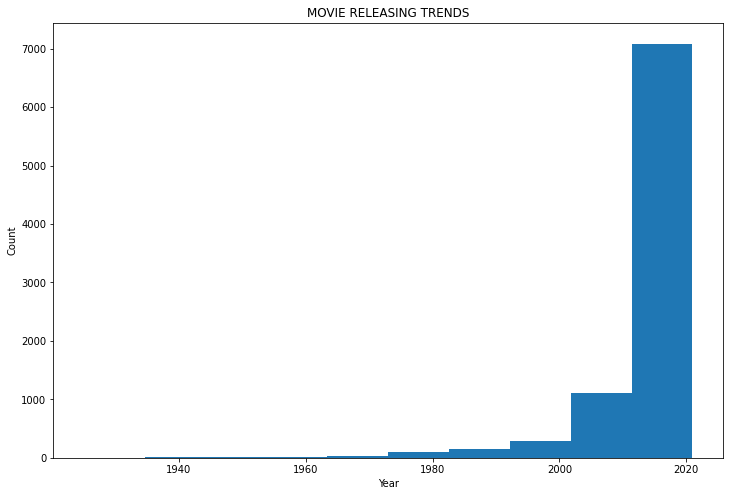

In [84]:
plt.figure(figsize=(12,8))
plt.hist(temp1['release_year'],bins=10)
plt.title("MOVIE RELEASING TRENDS")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The histogram obtained is a left-skewed one.This means that the number of movies released per year had increased gradually till 2019.The peak production is in the years 2000-2020

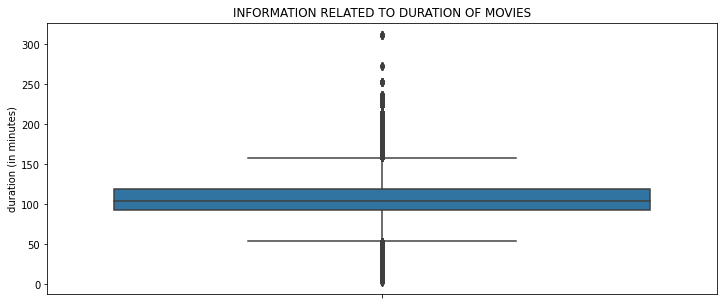

In [85]:
plt.figure(figsize=(12,5))
sns.boxplot(y=df_movies['duration (in minutes)'])
plt.title("INFORMATION RELATED TO DURATION OF MOVIES")
plt.show()

From the boxplot its clear that the mean duration of a movie is about 105 mins , max duration is about 310 mins,The min duration is about 3 mins,median duration is close to 105 mins

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


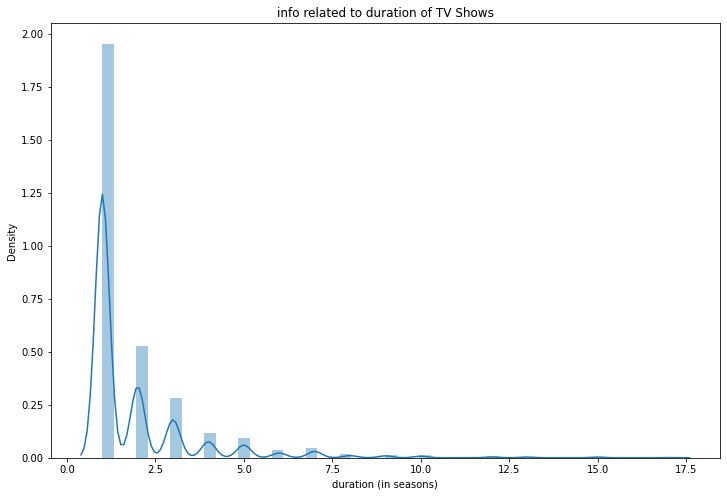

In [86]:
plt.figure(figsize=(12,8))
sns.distplot(df_shows['duration (in seasons)'])
plt.title("info related to duration of TV Shows")
plt.show()

from the distplot it is clear that that the mean duration (in seasons) of the TV Shows is about 2 seasons

#Univariate analysis-Categorical



In [87]:
temp=pd.DataFrame(df[['type']].value_counts())
temp=temp.reset_index()
temp.columns=['type','count']
temp

,type,count
0,Movie,6131
1,TV Show,2676


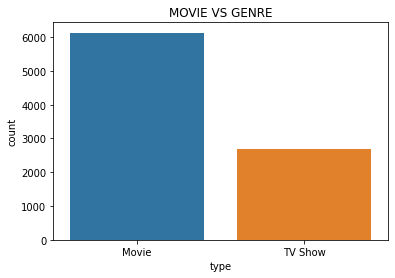

In [88]:
types=df.drop_duplicates(subset=['show_id','type']).reset_index()
sns.countplot(data=types,x='type')
plt.title("MOVIE VS GENRE")
plt.show()

from the plot it is clear that no: of TV Shows added to netflix is very less compared to the number of movies added .This means that netflix is more inclined towards than TV Shows

In [89]:
temp3=df_movies[['title','genres']]
temp3=temp3.drop_duplicates()
temp3=pd.DataFrame(temp3[['genres']].value_counts())
temp3=temp3.reset_index()
temp3.columns=['genres','counts']

Text(0.5, 1.0, 'genres and counts of movies')

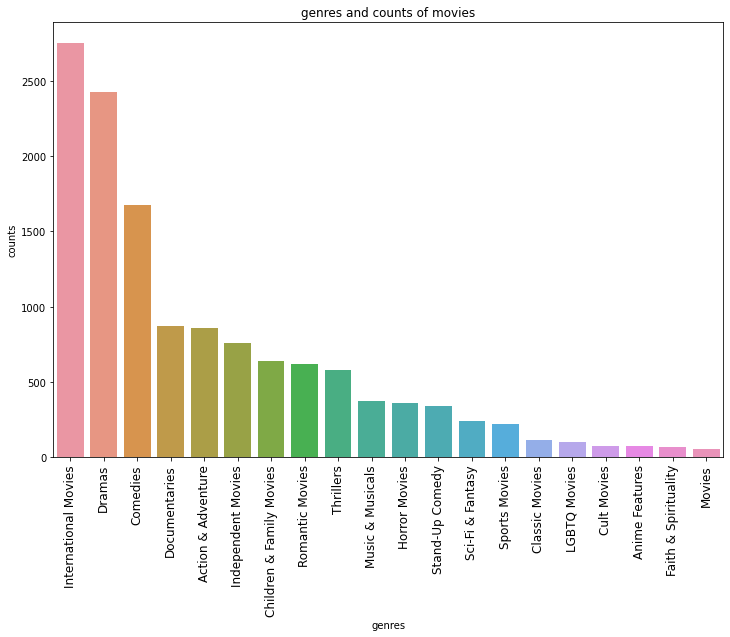

In [90]:
plt.figure(figsize=(12,8))
sns.barplot(data=temp3,x='genres',y='counts')
plt.xticks(rotation=90,fontsize=12)
plt.title('genres and counts of movies')

From the plot,It is found that international movies are the most added genres in netfix,followed by Dramas and Comedies

In [91]:
temp4=df_shows[['title','genres']]
temp4=temp4.drop_duplicates()
temp4=pd.DataFrame(temp4[['genres']].value_counts())
temp4=temp4.reset_index()
temp4.columns=['genres','counts']

Text(0.5, 1.0, 'genres and counts of shows')

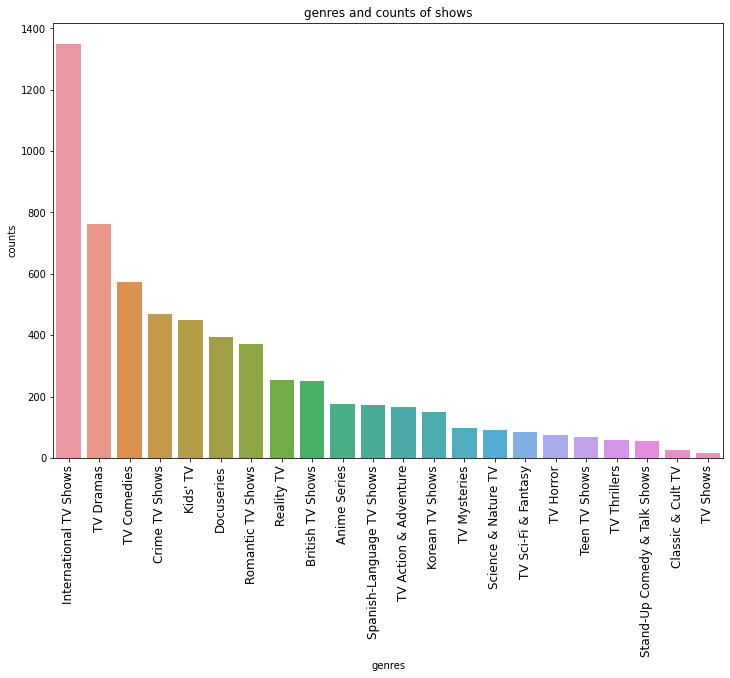

In [92]:
plt.figure(figsize=(12,8))
sns.barplot(data=temp4,x='genres',y='counts')
plt.xticks(rotation=90,fontsize=12)
plt.title('genres and counts of shows')

From the above plot,International TV Shows,TV Dramas and TV Comedies are the most popular ones





FROM THE ABOVE TWO PLOTS IT IS CLEAR THAT, BE IT MOVIES OR TV SHOWS,
INTERNATION,DRAMAS AND COMEDIES ARE LIKED BY MOST PEOPLE

In [93]:
#analysing the trends in top 4 movie producting country
top_4_movies_country=df_movies.groupby('country')['title'].agg('nunique').sort_values(ascending=False).head(5).reset_index()

In [94]:
top_4_movies_country.drop(top_4_movies_country[top_4_movies_country.country=='Unknown country'].index, inplace=True)
top_4_movies_country.index=[i for i in range(1,5)]
top_4_movies_country

,country,title
1,United States,2749
2,India,962
3,United Kingdom,534
4,Canada,319


In [95]:
#analysing the trends in usa for past 30 years
movie_us=df_movies.loc[(df_movies['country']=='United States') & (df_movies['release_year']>=1990)]
movie_us_drop_dup=movie_us[['title','release_year']].drop_duplicates()


In [96]:
movie_us_year_trend=pd.DataFrame(movie_us_drop_dup['release_year'].value_counts())
movie_us_year_trend=movie_us_year_trend.reset_index()
movie_us_year_trend.columns=['year',"movie_count"]


In [97]:
movie_ind=df_movies.loc[(df_movies['country']=='India') & (df_movies['release_year']>=1990)]
movie_ind_drop_dup=movie_ind[['title','release_year']].drop_duplicates()


In [98]:
movie_ind_year_trend=pd.DataFrame(movie_ind_drop_dup['release_year'].value_counts())
movie_ind_year_trend=movie_ind_year_trend.reset_index()
movie_ind_year_trend.columns=['year',"movie_count"]


In [99]:
movie_uk=df_movies.loc[(df_movies['country']=='United Kingdom') & (df_movies['release_year']>=1990)]
movie_uk_drop_dup=movie_uk[['title','release_year']].drop_duplicates()


In [100]:
movie_uk_year_trend=pd.DataFrame(movie_uk_drop_dup['release_year'].value_counts())
movie_uk_year_trend=movie_uk_year_trend.reset_index()
movie_uk_year_trend.columns=['year',"movie_count"]


In [101]:
movie_can=df_movies.loc[(df_movies['country']=='Canada') & (df_movies['release_year']>=1990)]
movie_can_drop_dup=movie_can[['title','release_year']].drop_duplicates()


In [102]:
movie_can_year_trend=pd.DataFrame(movie_can_drop_dup['release_year'].value_counts())
movie_can_year_trend=movie_can_year_trend.reset_index()
movie_can_year_trend.columns=['year',"movie_count"]


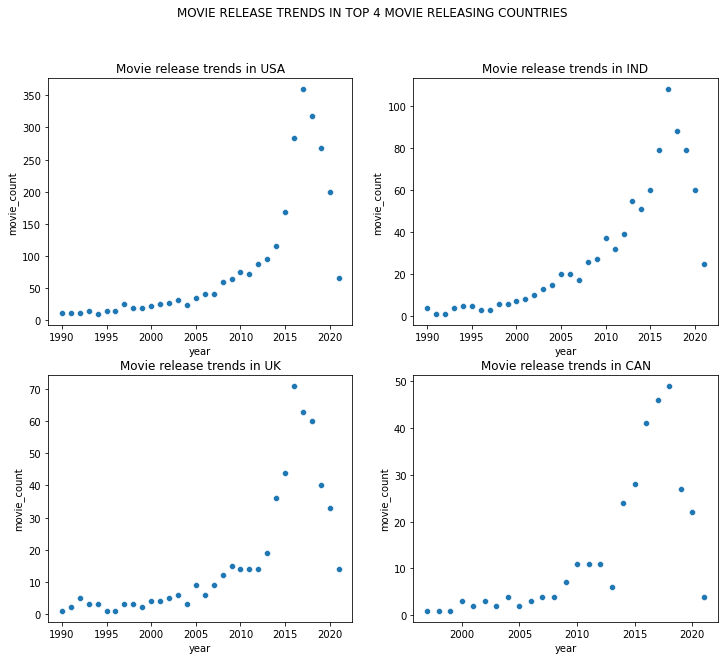

In [103]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(data=movie_us_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in USA')

plt.subplot(2,2,2)
sns.scatterplot(data=movie_ind_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in IND')


plt.subplot(2,2,3)
sns.scatterplot(data=movie_uk_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in UK')


plt.subplot(2,2,4)
sns.scatterplot(data=movie_can_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in CAN')

fig.suptitle("MOVIE RELEASE TRENDS IN TOP 4 MOVIE RELEASING COUNTRIES")
plt.show()


Top 4 Movie producing countries have almost similar pattern of movie releasing.It peaks in 2015-2016 and reduced drastically towards the end of 2020

In [104]:
#analysing the trends in top 4 show producting country
top_4_shows_country=df_shows.groupby('country')['title'].agg('nunique').sort_values(ascending=False).head(5).reset_index()


In [105]:
top_4_shows_country.drop(top_4_shows_country[top_4_shows_country.country=='Unknown country'].index, inplace=True)
top_4_shows_country.index=[i for i in range(1,5)]
top_4_shows_country

,country,title
1,United States,932
2,United Kingdom,271
3,Japan,198
4,South Korea,170


In [106]:
#analysing the show trends in usa for past 30 years
show_us=df_shows.loc[(df_shows['country']=='United States') & (df_shows['release_year']>=1990)]
show_us_drop_dup=show_us[['title','release_year']].drop_duplicates()
show_us_drop_dup

,title,release_year
498,Dear White People,2021
996,He-Man and the Masters of the Universe,2021
1384,Nailed It,2021
1692,Saved by the Bell,1994
1856,Lucifer,2021
...,...,...
200154,When Calls the Heart,2017
200614,Winsanity,2016
200776,Women Behind Bars,2010
201414,Yo-Kai Watch,2015


In [107]:
show_us_year_trend=pd.DataFrame(show_us_drop_dup['release_year'].value_counts())
show_us_year_trend=show_us_year_trend.reset_index()
show_us_year_trend.columns=['year',"show_count"]



In [108]:
show_uk=df_shows.loc[(df_shows['country']=='United Kingdom') & (df_shows['release_year']>=1990)]
show_uk_drop_dup=show_uk[['title','release_year']].drop_duplicates()
show_uk_drop_dup

,title,release_year
323,The Great British Baking Show,2021
809,Sex Education,2020
1686,Numberblocks,2021
1729,Jack Whitehall: Travels with My Father,2021
2161,The Circle,2021
...,...,...
198402,Twirlywoos,2018
199850,Weird Wonders of the World,2016
200465,Wild Alaska,2015
200468,Wild Arabia,2013


In [109]:
show_uk_year_trend=pd.DataFrame(show_uk_drop_dup['release_year'].value_counts())
show_uk_year_trend=show_uk_year_trend.reset_index()
show_uk_year_trend.columns=['year',"show_count"]
show_uk_year_trend

,year,show_count
0,2017,38
1,2018,36
2,2020,35
3,2016,31
4,2019,28
5,2021,22
6,2015,22
7,2014,10
8,2013,9
9,2012,8


In [110]:
show_jap=df_shows.loc[(df_shows['country']=='Japan') & (df_shows['release_year']>=1990)]
show_jap_drop_dup=show_jap[['title','release_year']].drop_duplicates()
show_jap_drop_dup

,title,release_year
1754,Yowamushi Pedal,2013
3632,Kuroko's Basketball,2015
5418,EDENS ZERO,2021
6195,Rascal Does Not Dream of Bunny Girl Senpai,2018
6809,SHAMAN KING,2021
...,...,...
177313,Power Rangers Wild Force,2002
177357,Power Rangers Zeo,1996
180072,Rurouni Kenshin,1998
189578,The Devil Is a Part-Timer!,2013


In [111]:
show_jap_year_trend=pd.DataFrame(show_jap_drop_dup['release_year'].value_counts())
show_jap_year_trend=show_jap_year_trend.reset_index()
show_jap_year_trend.columns=['year',"show_count"]
show_jap_year_trend

,year,show_count
0,2018,33
1,2019,24
2,2017,21
3,2020,15
4,2014,13
5,2016,13
6,2021,12
7,2015,11
8,2008,7
9,2010,6


In [112]:
show_sk=df_shows.loc[(df_shows['country']=='South Korea') & (df_shows['release_year']>=1990)]
show_sk_drop_dup=show_sk[['title','release_year']].drop_duplicates()
show_sk_drop_dup

,title,release_year
2318,Tayo the Little Bus,2016
2714,Pororo - The Little Penguin,2013
4738,D.P.,2021
6783,The Crowned Clown,2019
11041,Her Private Life,2019
...,...,...
189113,The Cravings,2016
192167,The Lady in Dignity,2017
196684,This Is My Love,2015
199283,Vroomiz,2016


In [113]:
show_sk_year_trend=pd.DataFrame(show_sk_drop_dup['release_year'].value_counts())
show_sk_year_trend=show_sk_year_trend.reset_index()
show_sk_year_trend.columns=['year',"show_count"]
show_sk_year_trend

,year,show_count
0,2016,28
1,2020,26
2,2017,23
3,2019,20
4,2018,20
5,2021,14
6,2015,11
7,2012,10
8,2014,7
9,2013,5


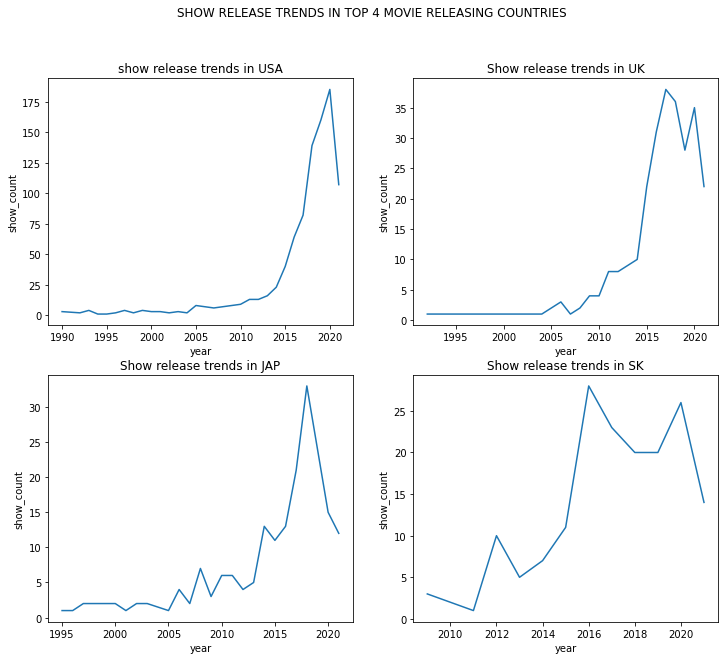

In [114]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.lineplot(data=show_us_year_trend,x='year',y='show_count')
plt.title('show release trends in USA')

plt.subplot(2,2,2)
sns.lineplot(data=show_uk_year_trend,x='year',y='show_count')
plt.title('Show release trends in UK')


plt.subplot(2,2,3)
sns.lineplot(data=show_jap_year_trend,x='year',y='show_count')
plt.title('Show release trends in JAP')


plt.subplot(2,2,4)
sns.lineplot(data=show_sk_year_trend,x='year',y='show_count')
plt.title('Show release trends in SK')

fig.suptitle("SHOW RELEASE TRENDS IN TOP 4 MOVIE RELEASING COUNTRIES")
plt.show()

SHOW RELEASE IN TOP 4 COUNTRIES HAVE BEEN AT PEAK IN 2015-2016.SOUTH KOREA STARTED PRODUCING SHOWS MORE RECENTLY AS COMPARED TO OTHER 3.IN ALL 4 COUNTRIES,THERE HAVE BEEN A DECLINE IN NO : OF SHOWS RELEASED AFTER 2019 BUT IN SK ,THIS TREND HAS STARTED FROM 2016

In [115]:
df_movies_drop_duplicates=df_movies.drop_duplicates(subset='show_id',keep='first')
df_movies_drop_duplicates

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration (in minutes)
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90.0
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
179,Sankofa,Kofi Ghanaba,Haile Gerima,Dramas,United States,s8,Movie,2021-09-24,1993,TV-MA,125.0
331,The Starling,Melissa McCarthy,Theodore Melfi,Comedies,United States,s10,Movie,2021-09-24,2021,PG-13,104.0
431,Je Suis Karl,Luna Wedler,Christian Schwochow,Dramas,Germany,s13,Movie,2021-09-23,2021,TV-MA,127.0
...,...,...,...,...,...,...,...,...,...,...,...
201940,Zinzana,Ali Suliman,Majid Al Ansari,Dramas,United Arab Emirates,s8802,Movie,2016-03-09,2015,TV-MA,96.0
201976,Zodiac,Mark Ruffalo,David Fincher,Cult Movies,United States,s8803,Movie,2019-11-20,2007,R,158.0
202009,Zombieland,Jesse Eisenberg,Ruben Fleischer,Comedies,United States,s8805,Movie,2019-11-01,2009,R,88.0
202023,Zoom,Tim Allen,Peter Hewitt,Children & Family Movies,United States,s8806,Movie,2020-01-11,2006,PG,88.0


# 4.3) CORRELATION ANALYSIS

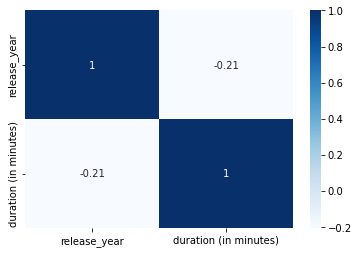

In [116]:
sns.heatmap(df_movies_drop_duplicates.corr(), cmap= "Blues", annot=True)

There is not much correlation between release_year and duration in minutes for movies and the correlation value is -0.21

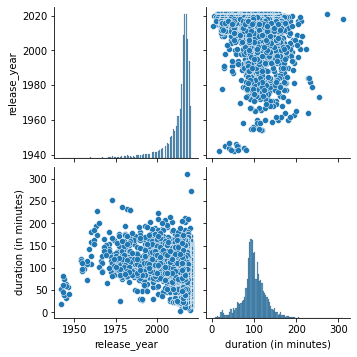

In [117]:
#pair plot for movies
sns.pairplot(data=df_movies_drop_duplicates)
plt.show()

There is not much correlation between movie release year and duration

In [118]:
df_shows_drop_duplicates=df_shows.drop_duplicates(subset='show_id')
df_shows_drop_duplicates

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration (in seasons)
1,Blood & Water,Ama Qamata,Unknown director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
58,Ganglands,Sami Bouajila,Julien Leclercq,Crime TV Shows,Unknown country,s3,TV Show,2021-09-24,2021,TV-MA,1.0
85,Jailbirds New Orleans,Unknown actor,Unknown director,Docuseries,Unknown country,s4,TV Show,2021-09-24,2021,TV-MA,1.0
87,Kota Factory,Mayur More,Unknown director,International TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2.0
111,Midnight Mass,Kate Siegel,Mike Flanagan,TV Dramas,Unknown country,s6,TV Show,2021-09-24,2021,TV-MA,1.0
...,...,...,...,...,...,...,...,...,...,...,...
201783,Yu-Gi-Oh! Arc-V,Mike Liscio,Unknown director,Anime Series,Japan,s8796,TV Show,2018-05-01,2015,TV-Y7,2.0
201803,Yunus Emre,Gökhan Atalay,Unknown director,International TV Shows,Turkey,s8797,TV Show,2017-01-17,2016,TV-PG,2.0
201839,Zak Storm,Michael Johnston,Unknown director,Kids' TV,United States,s8798,TV Show,2018-09-13,2016,TV-Y7,3.0
201913,Zindagi Gulzar Hai,Sanam Saeed,Unknown director,International TV Shows,Pakistan,s8801,TV Show,2016-12-15,2012,TV-PG,1.0


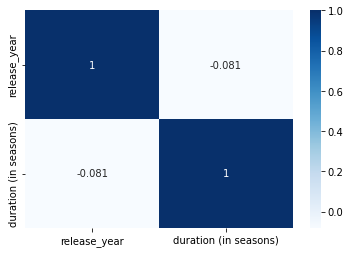

In [119]:
sns.heatmap(df_shows_drop_duplicates.corr(), cmap= "Blues", annot=True)

The correlation value between release_year and show duration in seasons is -0.081 which is very low implying not much correlation

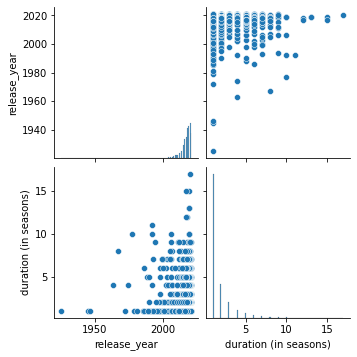

In [120]:
#pair plot for shows
sns.pairplot(data=df_shows_drop_duplicates)
plt.show()

There is not much correlation between show release year and duration

#  FURTHER ANALYSIS TO DRAW MORE INSIGHTS




# MOVIES

In [121]:
# top 10 actors acting in movies around the world(based on number of movies they acted)
top_10_movie_actors=df_movies.groupby('actors')['title'].agg("nunique").sort_values(ascending=False).head(11).reset_index()


In [122]:
top_10_movie_actors.drop(top_10_movie_actors[top_10_movie_actors.actors=='Unknown actor'].index, inplace=True)

In [123]:
top_10_movie_actors.index=[i for i in range(1,11)]
top_10_movie_actors

,actors,title
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Akshay Kumar,30
5,Om Puri,30
6,Julie Tejwani,28
7,Paresh Rawal,28
8,Amitabh Bachchan,28
9,Rupa Bhimani,27
10,Boman Irani,27


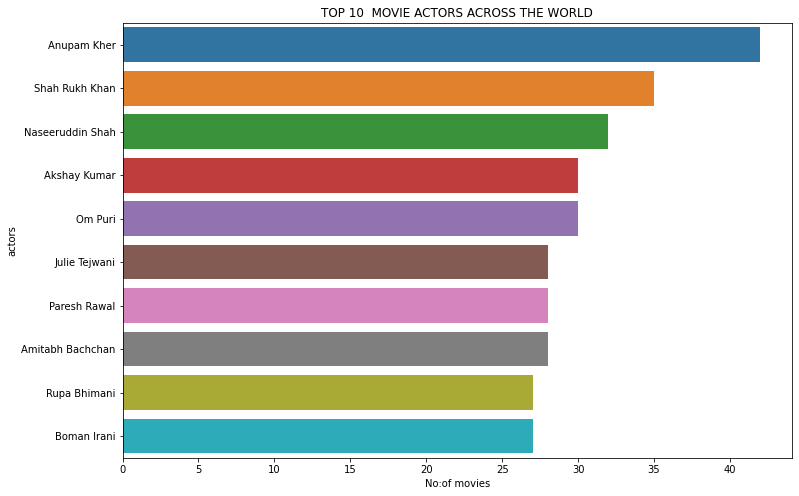

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_movie_actors,y='actors',x='title')
plt.title("TOP 10  MOVIE ACTORS ACROSS THE WORLD")
plt.xlabel('No:of movies')
plt.show()

From this graph, it is clear that Anupam kher, Shah Rukh khan and Naseeruddin Shah are the actors acted in most movies.
Interesting fact is that all are from India

Even the top 10 actors are all from India



In [125]:
#top 10 directors movie directors across the world
top_10_movie_directors=df_movies.groupby('directors')['title'].agg("nunique").sort_values(ascending=False).head(11).reset_index()


In [126]:
top_10_movie_directors.drop(top_10_movie_directors[top_10_movie_directors.directors=='Unknown director'].index, inplace=True)
top_10_movie_directors.index=[i for i in range(1,11)]
top_10_movie_directors

,directors,title
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,15
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Jay Chapman,12


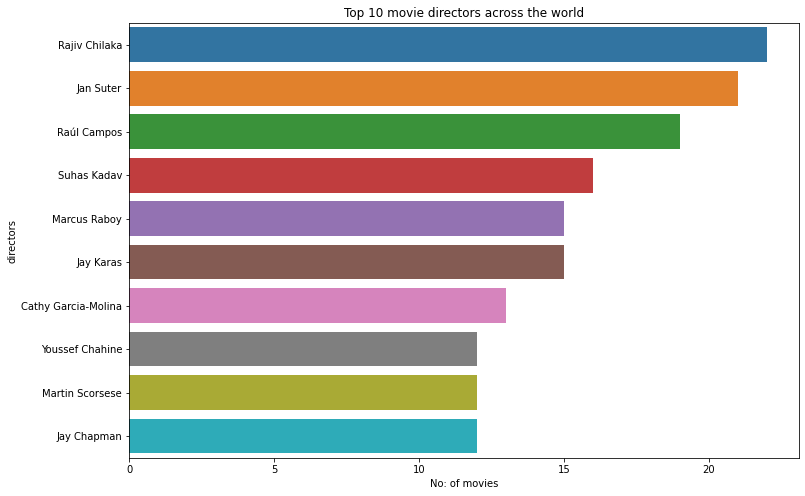

In [127]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_movie_directors,y='directors',x='title')
plt.title("Top 10 movie directors across the world")
plt.xlabel("No: of movies")
plt.show()

Rajiv Chilaka,Jan Suter and Raul Campos are the top 3 directors who directed most no:of movies across the world

In [128]:
#movie numbers based on the ratings around the world
df_movies.groupby('rating')['title'].agg("nunique").sort_values(ascending=False)

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            77
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: title, dtype: int64

In [129]:
#top 10 movie producing country
top_10_movies_country=df_movies.groupby('country')['title'].agg('nunique').sort_values(ascending=False).head(11).reset_index()


In [130]:
top_10_movies_country.drop(top_10_movies_country[top_10_movies_country.country=='Unknown country'].index, inplace=True)
top_10_movies_country.index=[i for i in range(1,11)]
top_10_movies_country

,country,title
1,United States,2749
2,India,962
3,United Kingdom,534
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


In [131]:
#attempt to find least movie producing countries
df_movies.groupby('country')['title'].agg("nunique").sort_values().head(10)

country
East Germany          1
Samoa                 1
Dominican Republic    1
Latvia                1
Ecuador               1
Ethiopia              1
Paraguay              1
Panama                1
Palestine             1
Nicaragua             1
Name: title, dtype: int64

In [132]:
#country wise movies and the ratings of top 10 movie producing countries

#1) USA
x_con=df_movies.groupby(['country','rating'])['title'].agg("nunique").sort_values(ascending=False).reset_index()
x_con[x_con['country']=='United States']



,country,rating,title
0,United States,TV-MA,719
1,United States,R,660
3,United States,PG-13,433
4,United States,TV-14,276
5,United States,PG,243
7,United States,TV-PG,180
23,United States,TV-Y7,55
25,United States,TV-Y,52
29,United States,TV-G,47
34,United States,NR,41


In [133]:
#2)India
x_con[x_con['country']=='India']

,country,rating,title
2,India,TV-14,547
6,India,TV-MA,232
11,India,TV-PG,133
87,India,TV-Y7,12
95,India,PG-13,11
127,India,PG,7
129,India,NR,7
130,India,TV-G,7
156,India,R,5
423,India,TV-Y7-FV,1


In [134]:
#3)UK
x_con[x_con['country']=='United Kingdom']

,country,rating,title
8,United Kingdom,R,145
10,United Kingdom,TV-MA,138
15,United Kingdom,PG-13,84
20,United Kingdom,TV-14,58
33,United Kingdom,TV-PG,41
46,United Kingdom,PG,35
96,United Kingdom,TV-G,10
103,United Kingdom,NR,10
168,United Kingdom,TV-Y,5
185,United Kingdom,G,4


In [135]:
#Canada
x_con[x_con['country']=='Canada']

,country,rating,title
16,Canada,R,79
17,Canada,TV-MA,72
47,Canada,PG,33
49,Canada,PG-13,32
55,Canada,TV-14,29
59,Canada,TV-Y,25
60,Canada,TV-PG,25
121,Canada,TV-G,8
126,Canada,TV-Y7,8
154,Canada,NR,5


In [136]:
x_con[x_con['country']=='France']

,country,rating,title
13,France,TV-MA,120
21,France,R,57
30,France,TV-14,45
43,France,PG-13,35
67,France,PG,21
106,France,TV-PG,9
181,France,NR,4
208,France,TV-Y7,3
217,France,TV-G,3
267,France,UR,2


In [137]:
top5_movies_ratings_country=x_con.loc[x_con['country'].isin(['United States','India','United Kingdom','Canada','France'])]

In [138]:
#top5_movies_ratings_country.sort_values('country')

#4.2)BIVARIATE ANALYSIS - CATEGORICAL--->MOVIES

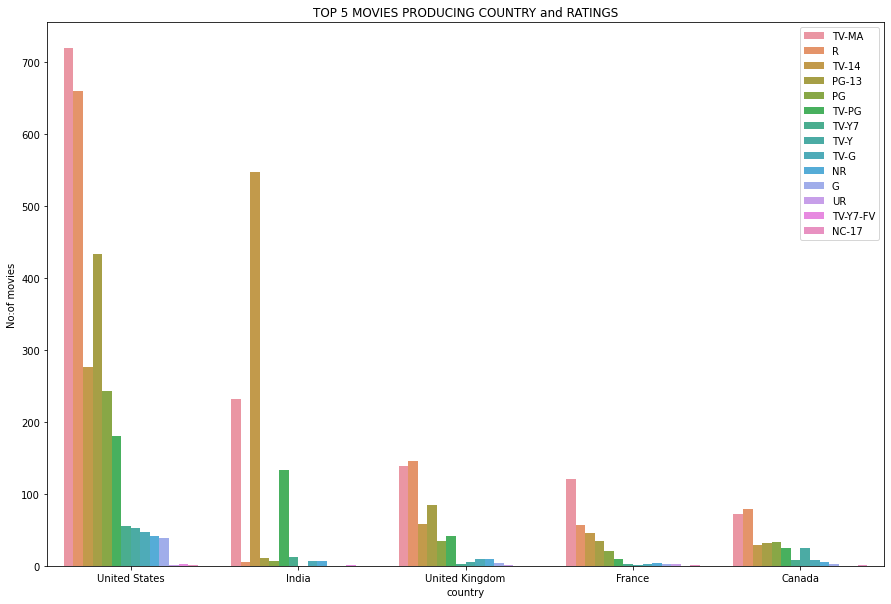

In [139]:
plt.figure(figsize=(15,10))
sns.barplot(data=top5_movies_ratings_country,x='country',hue='rating',y='title')
plt.ylabel('No:of movies')
plt.title("TOP 5 MOVIES PRODUCING COUNTRY and RATINGS")
plt.legend(loc='upper right')
plt.show()

Carefully analysing the top 5 movie producing countries and their rating trends,
It can be found that United States produce Movies in all ratings (14 different ratings) amoung which TV-MA is popular one

India produce movies of 10 different ratings among which TV-14 is the most popular one

UK and Canada produce movies of rating R

In overall  UR AND NC-17  are the least movies in these countries

In [140]:
#top5 movies producing countries and the genre they produce
x_genre=df_movies.groupby(['country','genres'])['title'].agg("nunique").sort_values(ascending=False).reset_index()
x_genre

,country,genres,title
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,512
...,...,...,...
911,Mexico,Classic Movies,1
912,Mauritius,Comedies,1
913,Mauritius,Children & Family Movies,1
914,Malta,Thrillers,1


In [141]:
#USA
x_genre[x_genre['country']=='United States']

,country,genres,title
1,United States,Dramas,835
2,United States,Comedies,680
4,United States,Documentaries,512
5,United States,Action & Adventure,404
6,United States,Independent Movies,390
7,United States,Children & Family Movies,390
9,United States,Thrillers,292
10,United States,Romantic Movies,225
11,United States,Stand-Up Comedy,216
14,United States,Horror Movies,201


In [142]:
#2)India
x_genre[x_genre['country']=='India']

,country,genres,title
0,India,International Movies,864
3,India,Dramas,662
8,India,Comedies,323
19,India,Independent Movies,167
23,India,Action & Adventure,137
25,India,Romantic Movies,120
30,India,Music & Musicals,96
34,India,Thrillers,92
100,India,Horror Movies,35
117,India,Documentaries,27


In [143]:
#3)UK
x_genre[x_genre['country']=='United Kingdom']

,country,genres,title
15,United Kingdom,Dramas,197
17,United Kingdom,International Movies,170
24,United Kingdom,Documentaries,128
35,United Kingdom,Comedies,91
37,United Kingdom,Action & Adventure,84
48,United Kingdom,Independent Movies,74
59,United Kingdom,Thrillers,61
73,United Kingdom,Children & Family Movies,46
90,United Kingdom,Romantic Movies,38
95,United Kingdom,Music & Musicals,36


In [144]:
#4)Canada
x_genre[x_genre['country']=='Canada']

,country,genres,title
32,Canada,Comedies,94
38,Canada,Dramas,82
41,Canada,Children & Family Movies,80
60,Canada,International Movies,60
70,Canada,Thrillers,49
77,Canada,Action & Adventure,44
78,Canada,Independent Movies,44
86,Canada,Documentaries,42
96,Canada,Horror Movies,36
111,Canada,Sci-Fi & Fantasy,28


In [145]:
#5)France
x_genre[x_genre['country']=='France']

,country,genres,title
13,France,International Movies,207
18,France,Dramas,167
49,France,Independent Movies,73
68,France,Comedies,51
74,France,Thrillers,44
76,France,Documentaries,44
94,France,Action & Adventure,37
130,France,Children & Family Movies,23
134,France,Romantic Movies,22
202,France,Sports Movies,12


In [146]:
top5_movies_genre_country=x_genre.loc[x_genre['country'].isin(['United States','India','United Kingdom','Canada','France'])]

In [147]:
top5_movies_genre_country.sort_values('country')

,country,genres,title
180,Canada,Music & Musicals,14
111,Canada,Sci-Fi & Fantasy,28
125,Canada,Romantic Movies,25
96,Canada,Horror Movies,36
60,Canada,International Movies,60
...,...,...,...
40,United States,Classic Movies,81
57,United States,LGBTQ Movies,63
67,United States,Cult Movies,52
10,United States,Romantic Movies,225


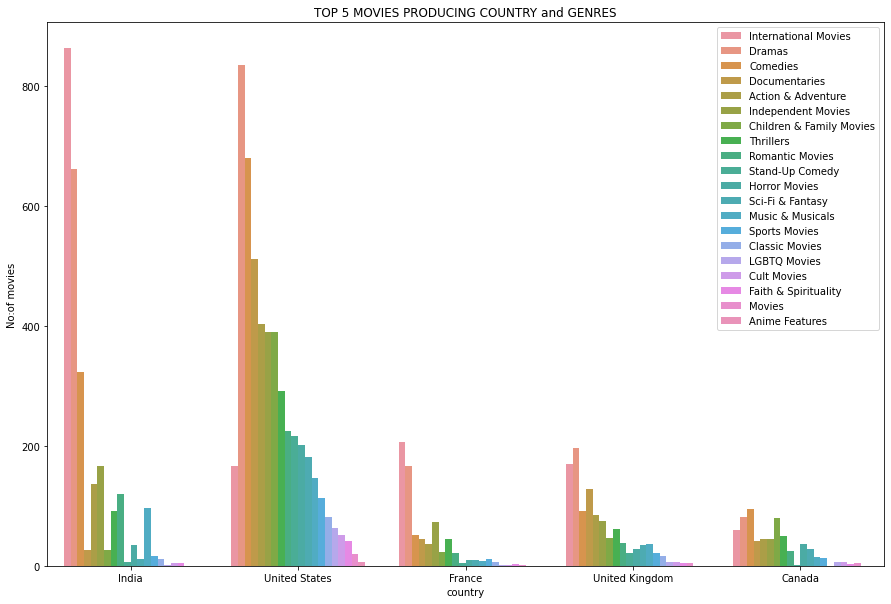

In [148]:
plt.figure(figsize=(15,10))
sns.barplot(data=top5_movies_genre_country,x='country',hue='genres',y='title')
plt.ylabel('No:of movies')
plt.title("TOP 5 MOVIES PRODUCING COUNTRY and GENRES")
plt.legend(loc='upper right')

In India International movies are being produced the most, least is LGBTQ movies.

In US ,It's the Dramas and comedies which are more popular and least being anime features.

In UK ,Dramas are more and 'Movies' is the least.

In France International movies are top and LGBTQ movies are at bottom.

In Canada,Comedies AND  Standup comedies achieved top and bottom position.

In [149]:
#top actors acting in movies in top 5 coutries
top_movie_actors_countrywise=df_movies.groupby(['country','actors'])['title'].agg('nunique').sort_values(ascending=False).reset_index()

In [150]:
#finding out top movie actors in top 5 movie producing countries
top_movie_actors_countrywise.drop(top_movie_actors_countrywise[top_movie_actors_countrywise.actors=='Unknown actor'].index, inplace=True)


In [151]:
#top movie actors in top 5 country
#1)USA 
#top_movie_actors_countrywise[top_movie_actors_countrywise['country']=='United States']
top5_movie_actors_usa=top_movie_actors_countrywise[top_movie_actors_countrywise['country']=='United States'][:5]
top5_movie_actors_usa

,country,actors,title
15,United States,Samuel L. Jackson,21
18,United States,Adam Sandler,20
21,United States,James Franco,19
23,United States,Nicolas Cage,18
39,United States,Fred Tatasciore,15


In [152]:
#2)India
#top_movie_actors_countrywise[top_movie_actors_countrywise['country']=='India']
top5_movie_actors_ind=top_movie_actors_countrywise[top_movie_actors_countrywise['country']=='India'][:5]
top5_movie_actors_ind

,country,actors,title
3,India,Anupam Kher,40
4,India,Shah Rukh Khan,34
5,India,Naseeruddin Shah,31
6,India,Akshay Kumar,29
7,India,Om Puri,29


In [153]:
#3)UK
top5_movie_actors_uk=top_movie_actors_countrywise[top_movie_actors_countrywise['country']=='United Kingdom'][:5]
top5_movie_actors_uk

,country,actors,title
149,United Kingdom,John Cleese,11
226,United Kingdom,Michael Palin,9
267,United Kingdom,Judi Dench,9
349,United Kingdom,Brendan Gleeson,8
434,United Kingdom,Helena Bonham Carter,8


In [154]:
#4)France
top5_movie_actors_france=top_movie_actors_countrywise[top_movie_actors_countrywise['country']=='France'][:5]
top5_movie_actors_france

,country,actors,title
983,France,Wille Lindberg,5
1682,France,Kristin Scott Thomas,4
1687,France,Liam Neeson,4
1692,France,Léa Seydoux,4
1701,France,Jesse Richman,4


In [155]:
#5)Canada
top5_movie_actors_can=top_movie_actors_countrywise[top_movie_actors_countrywise['country']=='Canada'][:5]
top5_movie_actors_can

,country,actors,title
165,Canada,John Paul Tremblay,10
201,Canada,Robb Wells,10
255,Canada,John Dunsworth,9
616,Canada,Mike Smith,7
619,Canada,Michela Luci,7


In [156]:
#top directing  movies in top 5 coutries
top_movie_directors_countrywise=df_movies.groupby(['country','directors'])['title'].agg('nunique').sort_values(ascending=False).reset_index()

In [157]:
#finding out top movie directors in top 5 movie producing countries
top_movie_directors_countrywise.drop(top_movie_directors_countrywise[top_movie_directors_countrywise.directors=='Unknown director'].index, inplace=True)

In [158]:
#1)USA
top_movie_directors_usa=top_movie_directors_countrywise[top_movie_directors_countrywise['country']=='United States'][:5]
top_movie_directors_usa

,country,directors,title
4,United States,Jay Karas,15
6,United States,Marcus Raboy,14
9,United States,Martin Scorsese,12
12,United States,Jay Chapman,12
13,United States,Steven Spielberg,11


In [159]:
#2)India
top_movie_directors_ind=top_movie_directors_countrywise[top_movie_directors_countrywise['country']=='India'][:5]
top_movie_directors_ind

,country,directors,title
18,India,David Dhawan,9
20,India,Anurag Kashyap,8
25,India,Umesh Mehra,8
30,India,Ram Gopal Varma,7
31,India,Dibakar Banerjee,7


In [160]:
#3)UK
top_movie_directors_uk=top_movie_directors_countrywise[top_movie_directors_countrywise['country']=='United Kingdom'][:5]
top_movie_directors_uk

,country,directors,title
166,United Kingdom,Edward Cotterill,4
223,United Kingdom,Blair Simmons,3
241,United Kingdom,Orlando von Einsiedel,3
272,United Kingdom,Jerry Rothwell,3
311,United Kingdom,Martin Campbell,3


In [161]:
#4)Canada
top_movie_directors_can=top_movie_directors_countrywise[top_movie_directors_countrywise['country']=='Canada'][:5]
top_movie_directors_can

,country,directors,title
21,Canada,Justin G. Dyck,8
108,Canada,Robert Vince,5
109,Canada,Mike Clattenburg,5
114,Canada,Mike Smith,4
141,Canada,Ishi Rudell,4


In [162]:
#5)France
top_movie_directors_france=top_movie_directors_countrywise[top_movie_directors_countrywise['country']=='France'][:5]
top_movie_directors_france

,country,directors,title
99,France,Thierry Donard,5
137,France,Youssef Chahine,4
293,France,Olivier Assayas,3
338,France,Florent Bodin,3
342,France,Jane Campion,3


In [163]:
df_movies.head()

,title,actors,directors,genres,country,show_id,type,date_added,release_year,rating,duration (in minutes)
0,Dick Johnson Is Dead,Unknown actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90.0
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown country,s7,Movie,2021-09-24,2021,PG,91.0


In [164]:
#time taken to add movies to netflix
df_time_to_add=df_movies[['title','release_year','date_added']]
df_time_to_add=df_time_to_add.drop_duplicates(subset='title')
df_time_to_add['time_taken_to_add']=df_time_to_add['date_added'].dt.year-df_time_to_add['release_year']
df_time_to_add['time_taken_to_add'].mean()

5.72943864229765

#SHOWS

In [165]:
# top 10 actors acting in shows around the world(based on number of shows they acted)
top_10_show_actors=df_shows.groupby('actors')['title'].agg("nunique").sort_values(ascending=False).head(11).reset_index()


In [166]:
top_10_show_actors.drop(top_10_show_actors[top_10_show_actors.actors=='Unknown actor'].index, inplace=True)

In [167]:
top_10_show_actors.index=[i for i in range(1,11)]
top_10_show_actors

,actors,title
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Ai Kayano,17
4,Daisuke Ono,17
5,Junichi Suwabe,17
6,Yuichi Nakamura,16
7,Yoshimasa Hosoya,15
8,Jun Fukuyama,15
9,David Attenborough,14
10,Vincent Tong,13


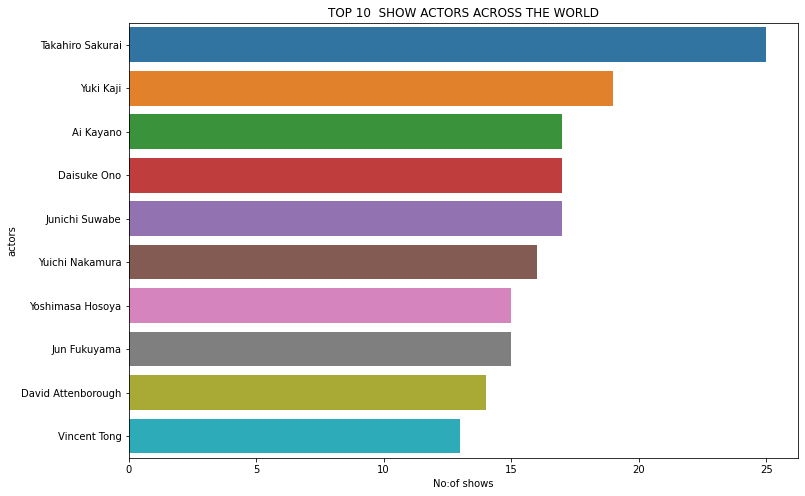

In [168]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_show_actors,y='actors',x='title')
plt.title("TOP 10  SHOW ACTORS ACROSS THE WORLD")
plt.xlabel('No:of shows')
plt.show()

Top actors acting in shows are Takahiro Sakurai,Yuki Kaji, Ai Kayano 

Carefully noticing , Among Top 10 ,Numbers are more from asia (particularly Japan,South Korea)

In [169]:
#top 10 show directors  across the world
top_10_show_directors=df_shows.groupby('directors')['title'].agg("nunique").sort_values(ascending=False).head(11).reset_index()

In [170]:
top_10_show_directors.drop(top_10_show_directors[top_10_show_directors.directors=='Unknown director'].index, inplace=True)
top_10_show_directors.index=[i for i in range(1,11)]
top_10_show_directors

,directors,title
1,Ken Burns,3
2,Alastair Fothergill,3
3,Stan Lathan,2
4,Joe Berlinger,2
5,Hsu Fu-chun,2
6,Gautham Vasudev Menon,2
7,Iginio Straffi,2
8,Lynn Novick,2
9,Shin Won-ho,2
10,Rob Seidenglanz,2


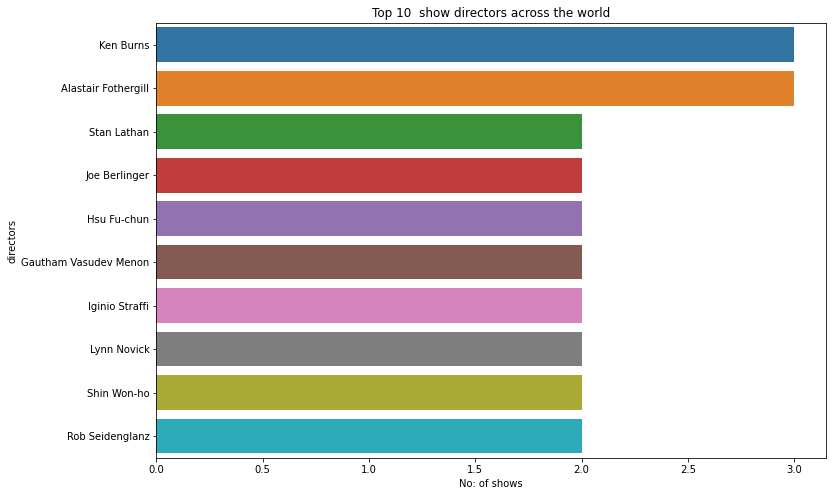

In [171]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_show_directors,y='directors',x='title')
plt.title("Top 10  show directors across the world")
plt.xlabel("No: of shows")
plt.show()

There is not much difference in number of shows  directed  by top 10 show directors. Ken Burns have directed 3 shows and all others in top 10 has directed 2 shows each


In [172]:
#show numbers based on the ratings around the world
df_shows.groupby('rating')['title'].agg("nunique").sort_values(ascending=False)

rating
TV-MA       1143
TV-14        730
TV-PG        321
TV-Y7        194
TV-Y         175
TV-G          94
NR             6
R              2
TV-Y7-FV       1
Name: title, dtype: int64

In [173]:
#top 10 show producing countries
top_10_shows_country=df_shows.groupby('country')['title'].agg('nunique').sort_values(ascending=False).head(11).reset_index()

In [174]:
top_10_shows_country.drop(top_10_shows_country[top_10_shows_country.country=='Unknown country'].index, inplace=True)
top_10_shows_country.index=[i for i in range(1,11)]
top_10_shows_country

,country,title
1,United States,932
2,United Kingdom,271
3,Japan,198
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,65
10,Spain,61


In [175]:
#country wise shows and the ratings of top 5 show producing countries
y_con=df_shows.groupby(['country','rating'])['title'].agg("nunique").sort_values(ascending=False).reset_index()


In [176]:
#1)USA
y_con.loc[y_con['country']=="United States"]

,country,rating,title
0,United States,TV-MA,381
1,United States,TV-14,219
3,United States,TV-PG,122
6,United States,TV-Y7,92
9,United States,TV-Y,75
18,United States,TV-G,42
147,United States,NR,1


In [177]:
#2)UK
y_con.loc[y_con['country']=="United Kingdom"]

,country,rating,title
4,United Kingdom,TV-MA,114
11,United Kingdom,TV-PG,57
15,United Kingdom,TV-14,45
25,United Kingdom,TV-Y,29
41,United Kingdom,TV-G,15
58,United Kingdom,TV-Y7,9
125,United Kingdom,NR,2


In [178]:
#3)JAPAN
y_con.loc[y_con['country']=="Japan"]

,country,rating,title
8,Japan,TV-14,75
10,Japan,TV-MA,69
26,Japan,TV-Y7,27
33,Japan,TV-PG,22
127,Japan,TV-G,2
128,Japan,TV-Y,2
153,Japan,NR,1


In [179]:
#4)South Korea
y_con.loc[y_con['country']=="South Korea"]

,country,rating,title
7,South Korea,TV-14,82
12,South Korea,TV-MA,55
40,South Korea,TV-PG,15
61,South Korea,TV-Y7,9
62,South Korea,TV-Y,8
152,South Korea,TV-G,1


In [180]:
#5)Canada
y_con.loc[y_con['country']=="Canada"]

,country,rating,title
21,Canada,TV-MA,35
27,Canada,TV-Y7,27
36,Canada,TV-Y,20
37,Canada,TV-14,20
45,Canada,TV-PG,14
56,Canada,TV-G,9
166,Canada,TV-Y7-FV,1


In [181]:
top5_shows_ratings_country=y_con.loc[y_con['country'].isin(['United States','Japan','United Kingdom','Canada','South Korea'])]

In [182]:
top5_shows_ratings_country.sort_values('country')

,country,rating,title
27,Canada,TV-Y7,27
56,Canada,TV-G,9
45,Canada,TV-PG,14
37,Canada,TV-14,20
36,Canada,TV-Y,20
21,Canada,TV-MA,35
166,Canada,TV-Y7-FV,1
33,Japan,TV-PG,22
10,Japan,TV-MA,69
127,Japan,TV-G,2


#4.2) BIVARIATE ANALYSIS-CATEGORICAL ====>SHOWS

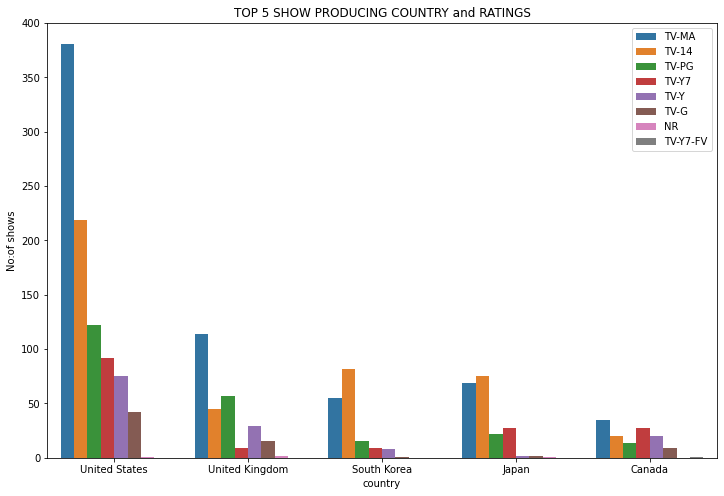

In [183]:
plt.figure(figsize=(12,8))
sns.barplot(data=top5_shows_ratings_country,x='country',hue='rating',y='title')
plt.ylabel('No:of shows')
plt.title("TOP 5 SHOW PRODUCING COUNTRY and RATINGS")
plt.legend(loc='upper right')

Among Top 5 show producing countries, TV- MA is the most trending rating
It is the top rating in US,UK and Canada. 

Carefully analysing there is a huge difference in top-most rating(TV-MA) and second-top(TV-14).In USA TV-G is the least produced rating.

In UK,Most shows produced are of TV-MA rating and least is TV-Y7

In South Korea TV-14 is top and TV-G is at bottom

In Japan also TV-14 is top and TV-Y is at bottom



In [184]:
#top5 show producing countries and the genre they produce
y_genre=df_shows.groupby(['country','genres'])['title'].agg("nunique").sort_values(ascending=False).reset_index()


In [185]:
#1)USA
y_genre.loc[y_genre['country']=='United States']

,country,genres,title
0,United States,TV Comedies,253
1,United States,TV Dramas,232
4,United States,Kids' TV,214
5,United States,Docuseries,191
8,United States,Crime TV Shows,145
12,United States,Reality TV,123
14,United States,TV Action & Adventure,93
19,United States,International TV Shows,73
25,United States,TV Sci-Fi & Fantasy,59
27,United States,TV Mysteries,51


In [186]:
#2)UK
y_genre.loc[y_genre['country']=='United Kingdom']

,country,genres,title
2,United Kingdom,British TV Shows,224
11,United Kingdom,International TV Shows,128
15,United Kingdom,Docuseries,89
32,United Kingdom,Crime TV Shows,48
37,United Kingdom,TV Comedies,43
39,United Kingdom,Kids' TV,43
45,United Kingdom,Reality TV,35
46,United Kingdom,TV Dramas,35
65,United Kingdom,Science & Nature TV,27
113,United Kingdom,Romantic TV Shows,11


In [187]:
#3)JAPAN
y_genre.loc[y_genre['country']=='Japan']

,country,genres,title
7,Japan,International TV Shows,151
9,Japan,Anime Series,142
57,Japan,Kids' TV,29
77,Japan,TV Dramas,21
78,Japan,Romantic TV Shows,21
95,Japan,Crime TV Shows,15
101,Japan,Teen TV Shows,14
123,Japan,TV Comedies,10
138,Japan,Reality TV,9
172,Japan,TV Thrillers,6


In [188]:
#4)South Korea
y_genre.loc[y_genre['country']=='South Korea']

,country,genres,title
6,South Korea,International TV Shows,152
10,South Korea,Korean TV Shows,132
18,South Korea,Romantic TV Shows,77
42,South Korea,TV Dramas,38
71,South Korea,Crime TV Shows,24
81,South Korea,TV Comedies,19
92,South Korea,Kids' TV,16
135,South Korea,TV Action & Adventure,9
227,South Korea,Reality TV,4
229,South Korea,Stand-Up Comedy & Talk Shows,4


In [189]:
#5)CANADA
y_genre.loc[y_genre['country']=='Canada']

,country,genres,title
24,Canada,Kids' TV,61
51,Canada,TV Dramas,32
56,Canada,TV Comedies,30
68,Canada,International TV Shows,25
94,Canada,Crime TV Shows,15
109,Canada,TV Action & Adventure,12
112,Canada,Docuseries,11
127,Canada,TV Sci-Fi & Fantasy,9
130,Canada,TV Mysteries,9
137,Canada,Reality TV,9


In [190]:
top5_shows_genre_country=y_genre.loc[y_genre['country'].isin(['United States','United Kingdom','Japan','South Korea','Canada'])]

In [191]:
top5_shows_genre_country.sort_values('country')

,country,genres,title
94,Canada,Crime TV Shows,15
68,Canada,International TV Shows,25
109,Canada,TV Action & Adventure,12
112,Canada,Docuseries,11
127,Canada,TV Sci-Fi & Fantasy,9
...,...,...,...
19,United States,International TV Shows,73
14,United States,TV Action & Adventure,93
12,United States,Reality TV,123
34,United States,Romantic TV Shows,44


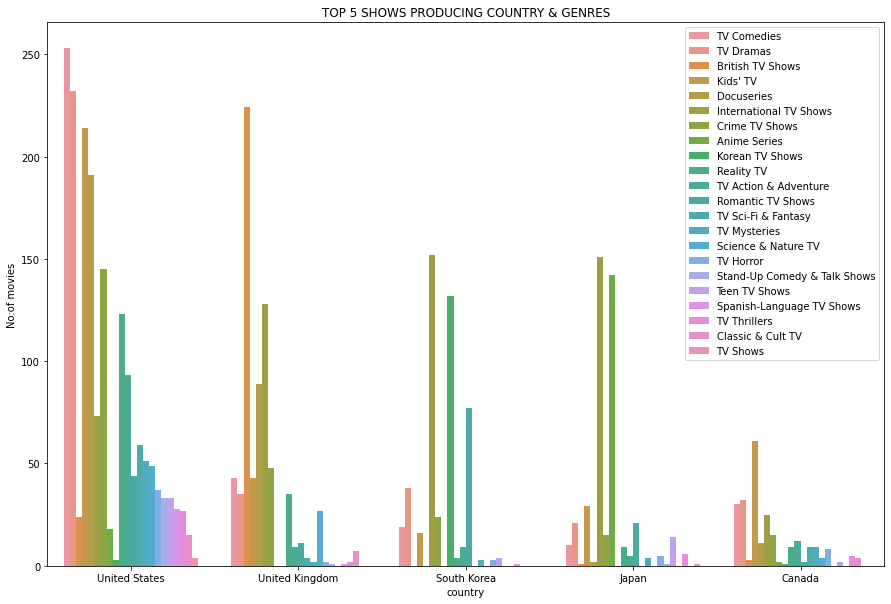

In [192]:
plt.figure(figsize=(15,10))
sns.barplot(data=top5_shows_genre_country,x='country',hue='genres',y='title')
plt.ylabel('No:of movies')
plt.title("TOP 5 SHOWS PRODUCING COUNTRY & GENRES")
plt.legend(loc='upper right')

In [193]:
#top actors acting in shows in top 5 coutries
top_show_actors_countrywise=df_shows.groupby(['country','actors'])['title'].agg('nunique').sort_values(ascending=False).reset_index()

In [194]:
#finding out top movie actors in top 5 movie producing countries
top_show_actors_countrywise.drop(top_show_actors_countrywise[top_show_actors_countrywise.actors=='Unknown actor'].index, inplace=True)

In [195]:
#top 5 actors in top 5 countries
#1)USA
top_show_actors_usa=top_show_actors_countrywise[top_show_actors_countrywise['country']=='United States'][:5]
top_show_actors_usa

,country,actors,title
21,United States,Grey Griffin,10
42,United States,Vincent Tong,8
54,United States,Mike Colter,7
58,United States,Tom Kenny,7
59,United States,Kari Wahlgren,7


In [196]:
#1)UK
top_show_actors_uk=top_show_actors_countrywise[top_show_actors_countrywise['country']=='United Kingdom'][:5]
top_show_actors_uk

,country,actors,title
13,United Kingdom,David Attenborough,13
105,United Kingdom,John Cleese,5
133,United Kingdom,Eric Idle,5
143,United Kingdom,Terry Jones,5
144,United Kingdom,Michael Palin,5


In [197]:
#3)JAP
top_show_actors_jap=top_show_actors_countrywise[top_show_actors_countrywise['country']=='Japan'][:5]
top_show_actors_jap

,country,actors,title
3,Japan,Takahiro Sakurai,22
5,Japan,Yuki Kaji,18
6,Japan,Daisuke Ono,17
7,Japan,Ai Kayano,16
8,Japan,Junichi Suwabe,16


In [198]:
#4)South korea
top_show_actors_sk=top_show_actors_countrywise[top_show_actors_countrywise['country']=='South Korea'][:5]
top_show_actors_sk

,country,actors,title
132,South Korea,Kim Won-hae,5
151,South Korea,Sung Dong-il,5
153,South Korea,Cho Seong-ha,5
171,South Korea,Nam Joo-hyuk,4
237,South Korea,Kim Sun-young,4


In [199]:
#4)Canada
top_show_actors_can=top_show_actors_countrywise[top_show_actors_countrywise['country']=='Canada'][:5]
top_show_actors_can

,country,actors,title
72,Canada,Ashleigh Ball,7
90,Canada,Vincent Tong,6
118,Canada,Andrea Libman,5
119,Canada,Brian Drummond,5
211,Canada,Sam Vincent,4


In [200]:
#top show directors in top 5 coutries
top_show_directors_countrywise=df_shows.groupby(['country','directors'])['title'].agg('nunique').sort_values(ascending=False).reset_index()

In [201]:
#finding out top movie actors in top 5 movie producing countries
top_show_directors_countrywise.drop(top_show_directors_countrywise[top_show_directors_countrywise.directors=='Unknown director'].index, inplace=True)


In [202]:
#1)USA
top_show_directors_usa=top_show_directors_countrywise[top_show_directors_countrywise['country']=='United States'][:5]
top_show_directors_usa

,country,directors,title
42,United States,Ken Burns,3
47,United States,Rob Seidenglanz,2
48,United States,Stan Lathan,2
54,United States,Lynn Novick,2
55,United States,Joe Berlinger,2


In [203]:
#2)UK
top_show_directors_uk=top_show_directors_countrywise[top_show_directors_countrywise['country']=='United Kingdom'][:5]
top_show_directors_uk

,country,directors,title
44,United Kingdom,Alastair Fothergill,3
65,United Kingdom,Tony Collingwood,1
85,United Kingdom,Laïla Marrakchi,1
86,United Kingdom,Toby Haynes,1
99,United Kingdom,Alan Poul,1


In [204]:
#3)Japan
top_show_directors_jap=top_show_directors_countrywise[top_show_directors_countrywise['country']=='Japan'][:5]
top_show_directors_jap

,country,directors,title
397,Japan,Moyoung Jin,1
398,Japan,Masaaki Yuasa,1
399,Japan,Kobun Shizuno,1
400,Japan,Kazuya Murata,1
401,Japan,Hiroyuki Seshita,1


In [205]:
#4)South korea
top_show_directors_sk=top_show_directors_countrywise[top_show_directors_countrywise['country']=='South Korea'][:5]
top_show_directors_sk

,country,directors,title
49,South Korea,Jung-ah Im,2
52,South Korea,Shin Won-ho,2
349,South Korea,Yim Pilsung,1
350,South Korea,Thomas Astruc,1
351,South Korea,Seung-uk Jo,1


In [206]:
#5)Canada
top_show_directors_can=top_show_directors_countrywise[top_show_directors_countrywise['country']=='Canada'][:5]
top_show_directors_can

,country,directors,title
296,Canada,Gary Howsam,1
318,Canada,Alastair Fothergill,1
319,Canada,Guy Vasilovich,1
321,Canada,John Paul Tremblay,1
335,Canada,Tony Collingwood,1


In [207]:
#time taken to add shows to netflix
df_time_to_add_show=df_shows[['title','release_year','date_added']]
df_time_to_add_show=df_time_to_add_show.drop_duplicates(subset='title')
df_time_to_add_show['time_taken_to_add']=df_time_to_add_show['date_added'].dt.year-df_time_to_add_show['release_year']
df_time_to_add_show['time_taken_to_add'].mean()

2.298199549887472

# 5) Missing Value & Outlier check

The original dataset had missing values in columns 'director'(2634 values),
'cast'(825) values,'country'(831 values),'date_added'(10 values),'rating'(4 values),'duration'(3 values)

These were detected in the initial part of the analysis (IN THE MISSING VALUE DETECTION SECTION OF THIS NOTEBOOK)

After the unpacking of data, the missing values in the director,actors,country columns were filled using 'Unknown director','Unknown actor','Unknown Country'.This can be found in the preprocessing and cleaning of
new dataset section of this notebook

Still there were missing values in date_added(158 values),rating(67 values),duration(3 values)

Eventhough there are 158 rows with null values , they are the data of 10 movies only.so dropping the data of 10 movies (shown in preprocessing and cleaning of new dataset section of this notebook) 

The missing values in ratings colummns were filled using "NR"(No rating)(shown in preprocessing and cleaning of new dataset section of this notebook) 

The missing values of in duration was also dropped becaus they were very small in number(3 values)(shown in preprocessing and cleaning of new dataset section of this notebook) 

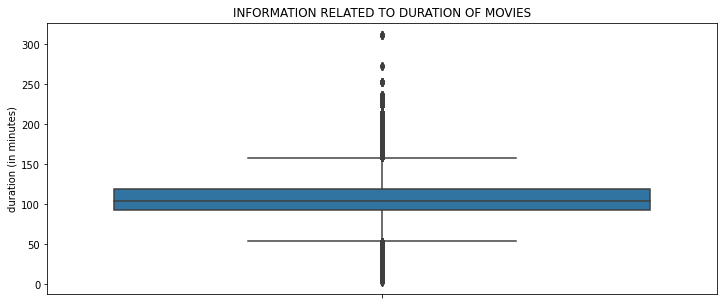

In [208]:
#outlier checks
plt.figure(figsize=(12,5))
sns.boxplot(y=df_movies['duration (in minutes)'])
plt.title("INFORMATION RELATED TO DURATION OF MOVIES")
plt.show()

Here it can be observed that avg duration of movies is about 105 mins
and the median value of the same is also about 102 mins.But there is a movie with duration of 312 mins which is very far from the other datapoints .Also there is a movie of duration 3 mins which can also be considered as an outlier

In [209]:
print('mean duration of movies :',df_movies['duration (in minutes)'].mean())
print('median duration of movies :',df_movies['duration (in minutes)'].median())
print('max duration of movies :',df_movies['duration (in minutes)'].max())
print('min duration of movies :',df_movies['duration (in minutes)'].min())

mean duration of movies : 106.84038543251505
median duration of movies : 104.0
max duration of movies : 312.0
min duration of movies : 3.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


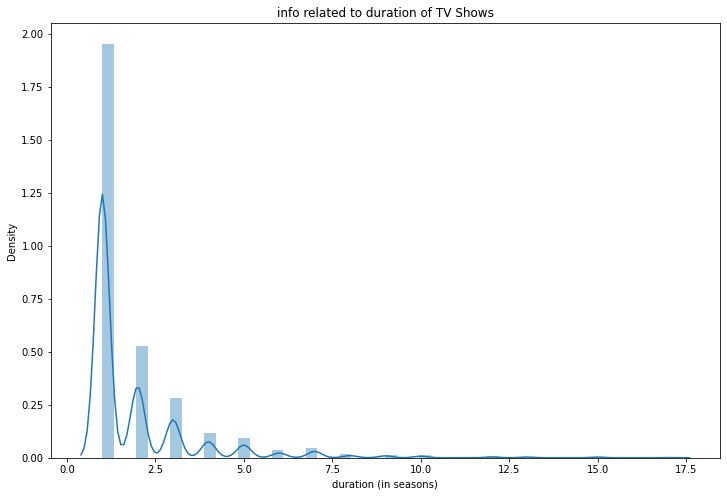

In [210]:
plt.figure(figsize=(12,8))
sns.distplot(df_shows['duration (in seasons)'])
plt.title("info related to duration of TV Shows")
plt.show()

In [211]:
print('mean duration of movies :',df_shows['duration (in seasons)'].mean())
print('median duration of movies :',df_shows['duration (in seasons)'].median())
print('max duration of movies :',df_shows['duration (in seasons)'].max())
print('min duration of movies :',df_shows['duration (in seasons)'].min())

mean duration of movies : 1.9176995892123594
median duration of movies : 1.0
max duration of movies : 17.0
min duration of movies : 1.0


In case of TV Shows also, the mean duration of a TV Show is approx 2 seasons,But there is a TV show with 17 seasons ,which is an outlier in case of shows

# 6)Insights based on Non-Graphical and Visual Analysis

# 6.1 Comments on the range of attributes

In [212]:
#movie attrinbutes range

df_movies.describe()

,release_year,duration (in minutes)
count,145914.000000,145914.000000
mean,2012.130625,106.840385
std,9.816623,24.709395
min,1942.000000,3.000000
25%,2010.000000,93.000000
50%,2016.000000,104.000000
75%,2018.000000,119.000000
max,2021.000000,312.000000


In [213]:
df_movies.describe(include='object')

,title,actors,directors,genres,country,show_id,type,rating
count,145914,145914,145914,145914,145914,145914,145914,145914
unique,6128,25952,4777,20,119,6128,1,14
top,Kahlil Gibran's The Prophet,Unknown actor,Unknown director,Dramas,United States,s7165,Movie,TV-MA
freq,700,1331,1285,29806,45814,700,145914,44009


In [214]:
print(df_movies['release_year'].min(),df_movies['release_year'].max())

1942 2021


The dataset contains movies released between 1942 and 2021

In [215]:
df_movies['genres'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

The movies are found in genres like { 'Documentaries', 'Children & Family Movies', 'Dramas','Independent Movies', 'International Movies', 'Comedies',
'Thrillers', 'Romantic Movies', 'Music & Musicals','Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure','Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies', 'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy','Movies'

> 



In [216]:
df_movies['rating'].unique()

array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

The rating in movies are found in {'PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G','TV-Y7', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'}

Ignoring NR there are 13 different ratings

In [217]:
#show related attributes
df_shows.describe()

,release_year,duration (in seasons)
count,55990.000000,55990.000000
mean,2016.892034,1.917700
std,5.061550,1.786946
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [218]:
df_shows.describe(include='object')

,title,actors,directors,genres,country,show_id,type,rating
count,55990,55990,55990,55990,55990,55990,55990,55990
unique,2666,14815,300,22,67,2666,1,9
top,The Eddy,Unknown actor,Unknown director,International TV Shows,United States,s2554,TV Show,TV-MA
freq,416,818,49200,12837,13449,416,55990,29874


In [219]:
print(df_shows['release_year'].min(),df_shows['release_year'].max())

1925 2021


The dataset contains shows between 1925 and 2021

In [220]:
df_shows['genres'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Crime TV Shows', 'TV Action & Adventure', 'Docuseries',
       'Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror',
       'British TV Shows', 'Spanish-Language TV Shows', 'TV Thrillers',
       "Kids' TV", 'TV Sci-Fi & Fantasy', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV'],
      dtype=object)

The different categories of shows available are {'International TV Shows', 'TV Dramas', 'TV Mysteries','Crime TV Shows', 'TV Action & Adventure', 'Docuseries','Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror',
'British TV Shows', 'Spanish-Language TV Shows', 'TV Thrillers',"Kids' TV", 'TV Sci-Fi & Fantasy', 'Anime Series','Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows','TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV'}

In [221]:
df_shows['rating'].unique()

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'R', 'NR',
       'TV-Y7-FV'], dtype=object)

The different ratings of the shows are {'TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'R', 'NR','TV-Y7-FV'}

Ignoring 'NR' there are 8 ratings

# 6.2) Comments on the distribution of the variables and relationship between them

There are 12 different variables in the original dataset.
They are 
{'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'listed_in', 'description'}

The type of shows are being distributed in 20 diffenrent genres 
They are

{'International TV Shows', 'TV Dramas', 'TV Mysteries','Crime TV Shows', 'TV Action & Adventure', 'Docuseries','Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror', 'British TV Shows', 'Spanish-Language TV Shows', 'TV Thrillers',"Kids' TV", 'TV Sci-Fi & Fantasy', 'Anime Series','Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows','TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV'}


The type of movies are being distributed in 20 diffenrent genres 
They are 

{'Documentaries', 'Children & Family Movies', 'Dramas','Independent Movies', 'International Movies', 'Comedies', 'Thrillers', 'Romantic Movies', 'Music & Musicals','Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure','Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies', 'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy','Movies'


The ratings in shows are distributed into 9 categories(including no rating)They are 

{'TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'R', 'NR','TV-Y7-FV'}


The ratings in movies are distributed into 13 categories(including no rating)They are

('PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR}

The min and max of release year in shows is 1925 and 2021

The min and max of release year in movies is 1942 and 2021

The min and max duration in shows is 1 season and 17 seasons respectively

The min and max duration in movies is 3 mins and 312 mins respectively


Among the shows international shows,tv dramas and tv comedies are the  most popular ones

Among the movies international movies,dramas and comedies are the  most popular ones

There is not much correlation between release_year and duration for both movies and TV Shows

(Each of the points have been found beforehand)




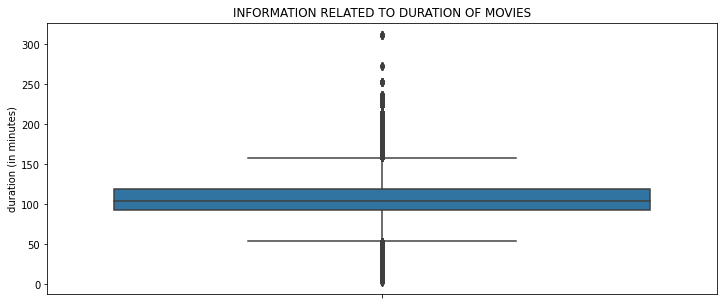

In [222]:
plt.figure(figsize=(12,5))
sns.boxplot(y=df_movies['duration (in minutes)'])
plt.title("INFORMATION RELATED TO DURATION OF MOVIES")
plt.show()

we can clearly see that values of duration in minutes for is ranging from 3 mins to 312 mins

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


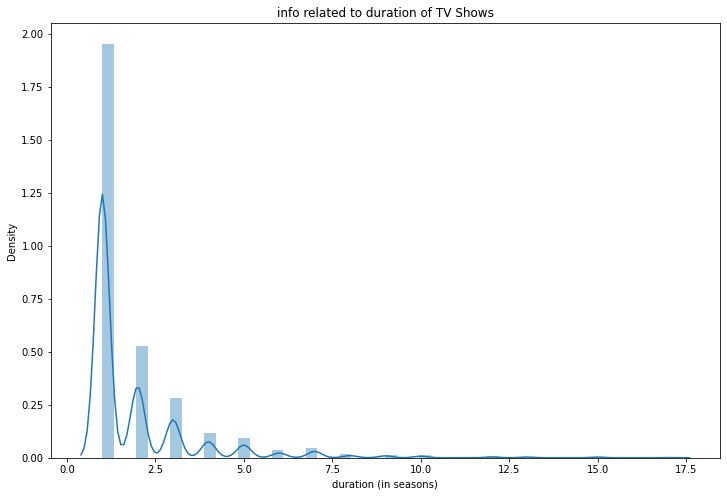

In [223]:
plt.figure(figsize=(12,8))
sns.distplot(df_shows['duration (in seasons)'])
plt.title("info related to duration of TV Shows")
plt.show()

The average duration in seasons for shows is about 2

#6.3Comments for each univariate and bivariate plot

The comments for each univariate and bivariate graphs are given in the comment section of each graphs

# 7 Business Insights

In [224]:
print("No : of countries in the dataset:",df_final['country'].nunique())
print("No : of actors in the dataset:",df_final['actors'].nunique())
print("No : of directors in the dataset:",df_final['directors'].nunique())
print("No : of genres in the dataset:",df_final['genres'].nunique())
print("No : of ratings in the dataset:",df_final['rating'].nunique())

No : of countries in the dataset: 124
No : of actors in the dataset: 36404
No : of directors in the dataset: 4993
No : of genres in the dataset: 42
No : of ratings in the dataset: 14


The dataset consists of data collected from 124 countries,The data consist of 36404 actors,4993 directors,42 different genres and 14 ratings.




1)  The top 10 movie producing countries are :   


1.   United States
2.   India
3.   United Kingdom
4.   Canada
5.   France
6.   Germany
7.   Spain
8.   Japan  
9.   China
10.  Mexico










2)The top 10 show producing countries are


1. United States 
2. United Kingdom
3. Japan
4. South Korea
5. Canada
6. France
7. India
8. Taiwan 
9. Australia 
10. Spain
 



3) The top 10 Movie actors are


1. Anupam Kher 
2. Shah Rukh Khan
3. Naseeruddin Shah
4. Akshay Kumar
5. Om Puri
6. Julie Tejwani
7. Paresh Rawal
8. Amitabh Bachan
9. Rupa Bhimani
10. Boman Irani




4) Top 10 TV Show actors are:


1.   Takahiro Sakurai
2.   Yuki Kaji
3.   Al Kayano 
4.   Daisuke Ono 
5.   Junichi Suwabe
6.   Yuichi Nakamura
7.   Yoshimasa Hosoya
8.   Jun Fukyama
9.   David Attenborough 
10.  Vincent Tong 





5) Top 10 Movie Directors are:


1.   Rajiv Chilaka
2.   Jan Suter
3.   Raul Campos
4.   Suhas Kadav
5.   Marcus Raboy
6.   Jay Karas
7.   Cathy Gracia-Molina
8.   Youssef Chahine
9.   Martin Scorsese
10.  Jay Chapman 





6) Top 10 TV Show Directors are 


1.   Ken Burns
2.   Alaistair Fothergill
3.   Stan Lathan
4.   Joe Berlinger
5.   Hsu Fu-chun
6.   Gautham Vasudev Menon
7.   Ignio Straffi
8.   Lynn Novick
9.   Shin Won Ho
10.  Rob Seidenglanz



7) Top 10 Movie genres are


1.   International Movies
2.   Dramas
3.   Comedies
4.   Documentanes
5.   Action and Adventure
6.   Independent Movies
7.   Childern and Family Movies
8.   Romantic Movies
9.   Thrillers 
10.  Music and Musicals




8) Top 10 TV Show genres are 


1.   International TV Shows
2.   TV Dramas
3.   TV Comedies
4.   Crime TV Shows
5.   Kids TV 
6.   Docuseries
7.   Romantic TV Shows
8.   Reality TV
9.   British TV Shows
10.  Anime series




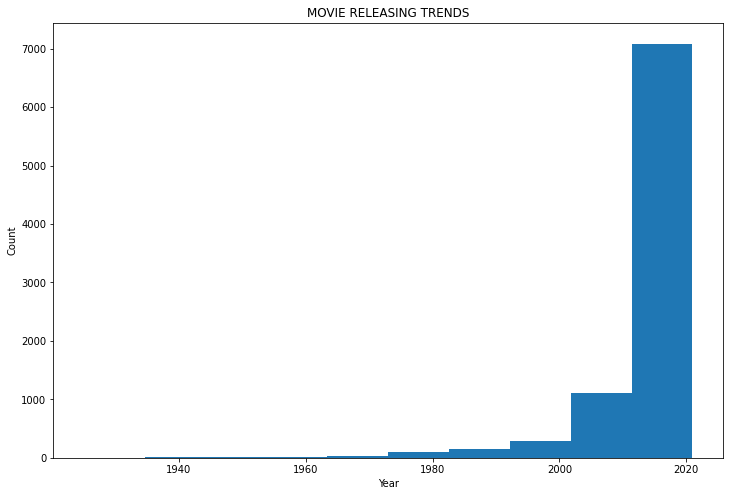

In [225]:
#pattern observed in movie releases
plt.figure(figsize=(12,8))
plt.hist(temp1['release_year'],bins=10)
plt.title("MOVIE RELEASING TRENDS")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

From movie releasing pattern it can be inferred that the no:of movies releasing per year had shown a huge increase from the 1980s.This continued till 2018-2019

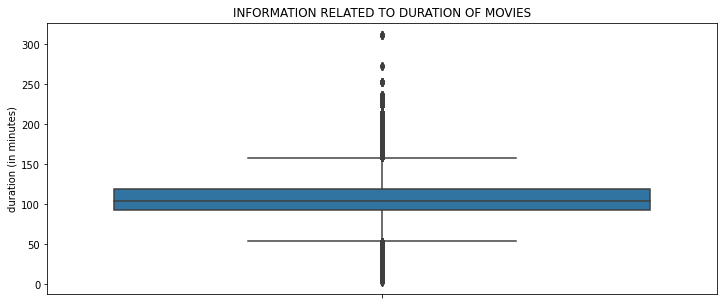

In [226]:
#Pattern observed in movie duration
plt.figure(figsize=(12,5))
sns.boxplot(y=df_movies['duration (in minutes)'])
plt.title("INFORMATION RELATED TO DURATION OF MOVIES")
plt.show()

The pattern observed from the movie duration are:


the mean duration of a movies is 106 mins

the max duration of a movie is 312 mins

the min duration of a movie is 3 mins

the median duration of a movie is approx 103 mins


So it can be inferred that the suitable length of a movie should be 100-110 mins

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


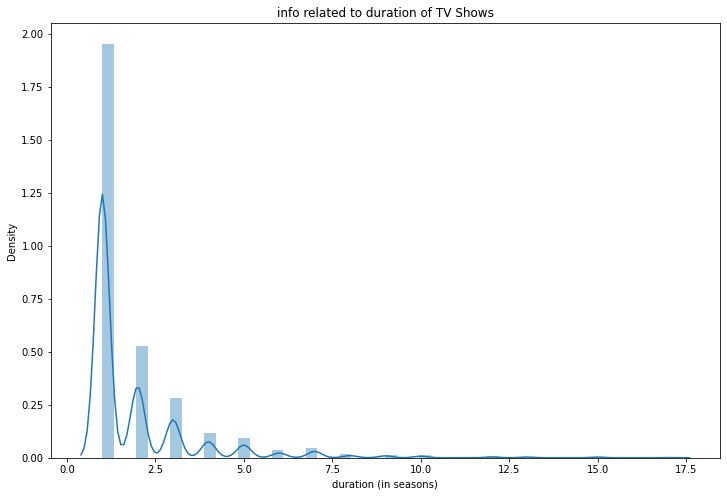

In [227]:
#pattern observed in show duration
plt.figure(figsize=(12,8))
sns.distplot(df_shows['duration (in seasons)'])
plt.title("info related to duration of TV Shows")
plt.show()

The avg duration of a  TV Show is 2 seasons 
The min duration is 1 season 


It can be drawn out that the people are intersted in watching Tv shows of 1 or 2 seasons

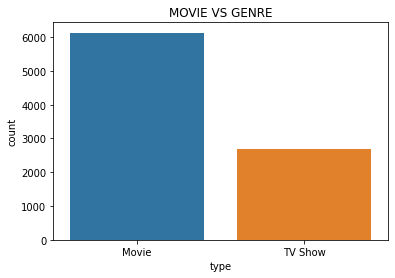

In [228]:
#MOVIE VS TV Show
types=df.drop_duplicates(subset=['show_id','type']).reset_index()
sns.countplot(data=types,x='type')
plt.title("MOVIE VS GENRE")
plt.show()

From this graph it is clear that the netflix is inclined more towards movies than the TV Shows

Text(0.5, 1.0, 'genres and counts of movies')

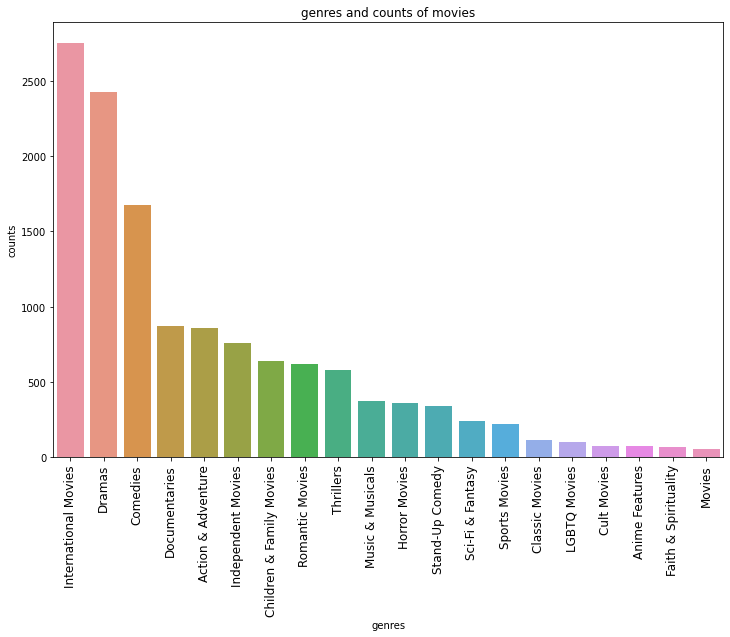

In [229]:
plt.figure(figsize=(12,8))
sns.barplot(data=temp3,x='genres',y='counts')
plt.xticks(rotation=90,fontsize=12)
plt.title('genres and counts of movies')

Most popular  Movie genres are International Movies,Dramas, Comedies

Text(0.5, 1.0, 'genres and counts of shows')

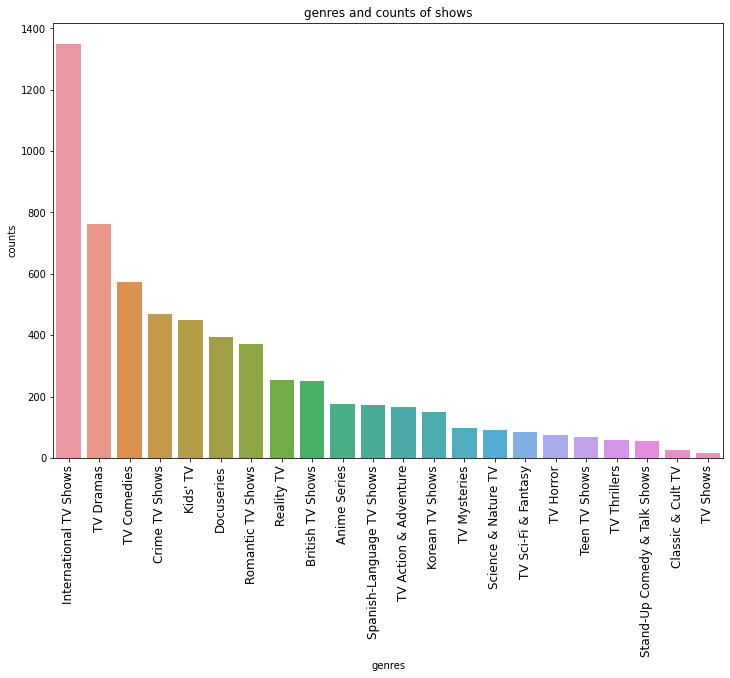

In [230]:
plt.figure(figsize=(12,8))
sns.barplot(data=temp4,x='genres',y='counts')
plt.xticks(rotation=90,fontsize=12)
plt.title('genres and counts of shows')

Most popular TV Show genres are International TV Shows, TV Dramas, TV Comedies

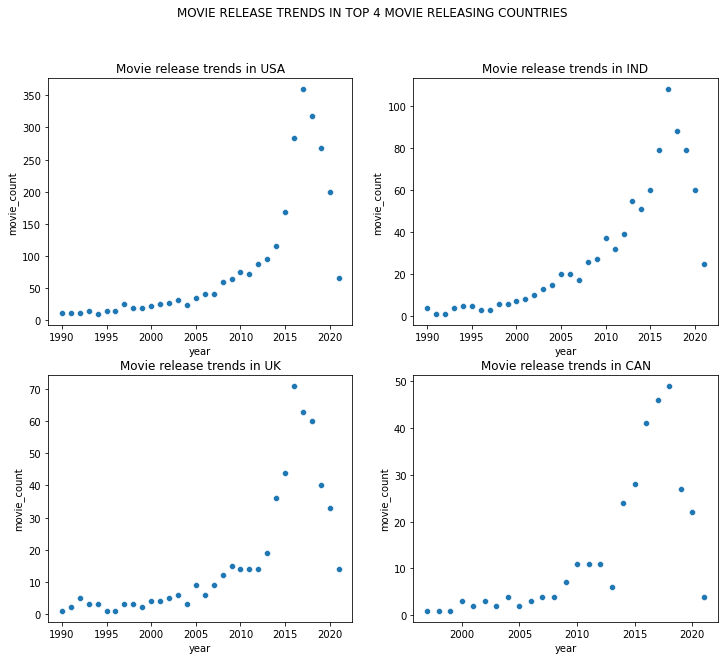

In [231]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(data=movie_us_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in USA')

plt.subplot(2,2,2)
sns.scatterplot(data=movie_ind_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in IND')


plt.subplot(2,2,3)
sns.scatterplot(data=movie_uk_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in UK')


plt.subplot(2,2,4)
sns.scatterplot(data=movie_can_year_trend,x='year',y='movie_count')
plt.title('Movie release trends in CAN')

fig.suptitle("MOVIE RELEASE TRENDS IN TOP 4 MOVIE RELEASING COUNTRIES")
plt.show()

From this graph it can be inferred that Movie release patterns in top 4 movie producing countries are similar.It reached peak in 2015-16 and declined towards the end of 2019-20

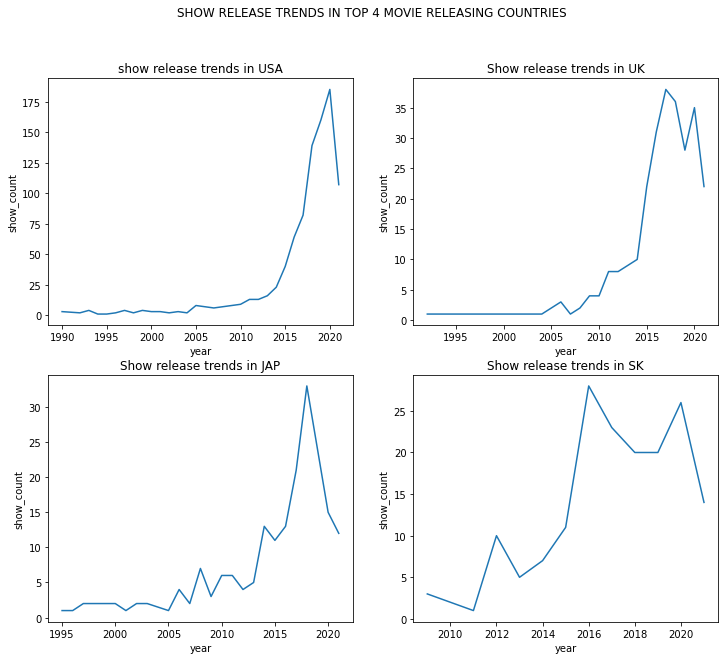

In [232]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.lineplot(data=show_us_year_trend,x='year',y='show_count')
plt.title('show release trends in USA')

plt.subplot(2,2,2)
sns.lineplot(data=show_uk_year_trend,x='year',y='show_count')
plt.title('Show release trends in UK')


plt.subplot(2,2,3)
sns.lineplot(data=show_jap_year_trend,x='year',y='show_count')
plt.title('Show release trends in JAP')


plt.subplot(2,2,4)
sns.lineplot(data=show_sk_year_trend,x='year',y='show_count')
plt.title('Show release trends in SK')

fig.suptitle("SHOW RELEASE TRENDS IN TOP 4 MOVIE RELEASING COUNTRIES")
plt.show()

from this plot it can be inferred that show production reached top in 2015-16 and declined towards the end of 2019-20.This decline may be due to the pandemic.

South Korea have huge potential for TV Shows because they started producing shows recently(from 2010) and became one among the top 4 show producing countries

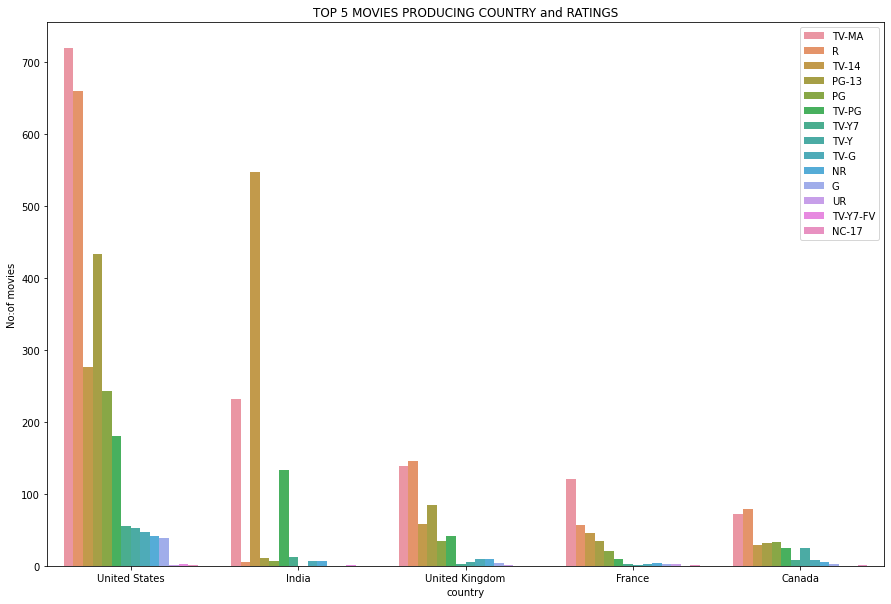

In [233]:
plt.figure(figsize=(15,10))
sns.barplot(data=top5_movies_ratings_country,x='country',hue='rating',y='title')
plt.ylabel('No:of movies')
plt.title("TOP 5 MOVIES PRODUCING COUNTRY and RATINGS")
plt.legend(loc='upper right')
plt.show()

From this graph it can be inferred that the popular ratings 


1.   US ---->most-----------------------------least
             1)TV-MA               NC-17
             2)R                   UR
             3)PG-13              TV-Y7-FV


2. Ind------>most   -----------------------------                 least
            1)TV-14                TV-Y7-FV
            2)TV-MA                 R
            3)TV-PG                 TV-G
3. UK------->most --------------------------least
            1)R                    UR
            2)TV-MA                TV-Y7
            3)PG-13                G
4. Canada---->most-------------------------------------       least
            1)R                            NC-17
            2)TV-MA                        G
            3) PG                          TV-Y7

5. France---->most---------------------------------------------least
            1)TV-MA                           TV-Y
            2)R                               NC-17
            3)TV-14                           G









Popular movie genres in top 5 countries(graph plotted earlier)

1. USA ---> 
          1) Dramas
          2)Comedies
          3)Documentaries
2. Ind----> 
          1)International Movies
          2)Dramas
          3)Comedies
3. UK------>
          1)Dramas
          2)International Movies
          3)Documentaries
4. Canada---->
          1)Comedies
          2)Dramas 
          3)Children & Family Movies
5. France------>
          1)International Movies
          2)Dramas
          3Independent Movies
          

           


Popular TV show ratings in top 5 TV show producing countries

1. USA
             1) TV-MA
             2)TV-14
             3)TV-PG
2. UK
             1)TV-MA
             2)TV-PG
             3)TV-14
3. JAPAN
             1)TV-14
             2)TV-MA
             3)TV-Y7
4. South Korea
            1)TV-14
            2)TV-MA
            3TV-PG
5.  Canada
            1)TV-MA
            2)TV-Y7
            3TV-Y
    

popular genres in top 5 show producing countires

1. USA
             1)TV Comedies
             2)TV Dramas
             3)Kids TV
2. UK
             1)British TV Shows
             2)International TV Shows
             3)Docuseries
3. Japan
             1)International TV shows
             2)Anime series
             3)Kids TV
4.  South Korea 
             1)International TV shows
             2)Korean TV shows
             3)Romantic Shows
5.  Canada 
             1)Kids TV
             2)TV Dramas
             3)TV comedies

#8) Recommendations

1. The focus should be more on top 5 movie producing and show producing countries.

2. US 
   
   1) USA gives the freedom to explore all ratings of movies ,so Top actors and directors USA can be brought together to make movies of all rating
   
   2) The top 3 Movie genres in usa are  
   
     1) Dramas
     
     2)Comedies
     
     3)Documentaries
  
     The top 3 Movie ratings are
   
     1)TV-MA
   
     2)R 
   
     3)PG-13 
   
   So If movies are to be produced in USA,It should be the combination these genres and ratings for better  viewrships.If netflix bring the top actor and directors for these movies,It may be giving better results

   3) Top TV Show genres in USA are
      
      1)TV Comedies
      
      2)TV Dramas
      
      3)Kids TV

      Top TV Show ratings in USA are
      
      1) TV-MA
      
      2)TV-14
      
      3)TV-PG

      So for producing shows in usa the combination of these genres and ratings might be the suitable option.
   
3.  India
   
   1)India is already a huge market for movies(currently 2nd).But it can also be converted to a huge market for TV Shows as well(currently 7th).There are huge number of content creators in India (which can be inferred from the fact that top 10 actors acted in most movies are all Indians).So if netflix try to collaborate these actors and top directors for producing TV Shows, It will lead to a huge increase market for  TV Shows in india

   2) For producing Movies  in India, The genres should be Interntional Movies ,Dramas and comedies and ratings should be TV-14,TV-MA,TV-PG.
   the top actors can be made to act in these movies and top directors can be used to direct these movies.

4. South Korea
   
   1) South korea can be a huge market for TV Shows because,It started producing shows recently(2010) and is among the top 5 show producing countries. So in South Korea the focus should be more to produce TV Shows.

5. In all the top 5 countries movies and shows can be made by top genres and top actors and top directors and top ratings of that country.(all the info about top actors,directors ,genres,ratings can be  found out in the sections above)

6. On an average netflix takes about 6 years to add a movie to the app/website from the time the movie was released.This time should be reduced for attarcting more viewers

7. On an average the netfliix takes about 2 years to add a show to the app/website from the time the show was released.This time should be reduced for attarcting more viewers.

8. While producing movies the duration should be kept about 100-110 mins

9. The suitable duration of TV shows are two seasons.

10. Japan  has huge market for Anime(which can be infferedn from the fact that Anime is second most popular genre in japan.This is a rare case as Anime is not among the top 3 show  genres for top 5 countries.

11. In Canada Kids TV can be given priority as it is the most popular shows in Canada.This is a rare case as kids tv is not in the top position for top  5 show producing countries
12. Romantic shows can be produced in   South korea beacuse its a rare case that romantic show is appearing in top 3 genres of top 5 show producing countries
13. In some of the least movie producing countries like Dominic republic,Samoa etc ,More analysis has be done to  find the reasons for less production.








    


    
    

